# Исследовательский анализ данных

- Автор:Ососов Ян
- Дата:18.06.2025


### Цели и задачи проекта

Цель: Провести исследовательский анализ рынка Москвы на основании данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года, инвесторы из фонда Shut Up and Take My Money решили попробовать себя в этой области и открыть заведение общественного питания в Москве.

Задачи:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
4. Сформулировать выводы по проведённому анализу.

### Описание данных

---
Наши данные представлены двумя датасетами - `1` и `2`.


- Файл `1` содержит информацию о заведениях общественного питания:

- Файл `2` содержит информацию о среднем чеке в заведениях общественного питания:


### Содержимое проекта

1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации
---

## 1. Загрузка данных и знакомство с ними


In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('1')
price_df = pd.read_csv('2')

Познакомимся с данными датасета `1`

In [3]:
info_df.info()
info_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Данный датасет содержит 8406 строкк и 9 столбцов
После первичного анализа делаем следующие выводы:
1. Названия в одинаковой стилистике все круто
2. Типы данных в целом соответствуют содержимому кроме `seats` как будто-бы нужен int однако там есть пропуски которе и привдят все к float - посмотрим, единственное что стоит оптимизировать с понижением размрности данныые в столбцах `chain` ,`rating`
3. Пропуски - `hours` и `seats`, но можно проверить и остальное
4. Данные соответствуют своему описанию

Познакомимся с данными датасета 2

In [4]:
price_df.info()
price_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


С этим датасетотм дела похуже, он содержит 4058 строк и 5 столбцов
1. Ну все в стиле snacke_case
2. В целом типы даннных соответсвуют ожиданиям быть может только `avg_bill` в теории было быы круто видеть как цифру, однако там содержатся фрагменты текста к примеру "Средний счёт:" 
3. Пропусков очень много: `price`, `avg_bill` - как-буто бы важно чтобы здеь не было пропусков, столбцы `middle_avg_bill` и `middle_coffee_cup` должны иметь зависимые пропуски и в сумме должны давать кол-во не нулевых строк в `avg_bill` но это не так надо бы изучить 
4. получается также около половиныы мест из первого датасеты не имеют информации о ценах это много что-же с этим делать надо бы решить
5. В целом значения соответсвуют описанию но можно и поизучать еще немного

---

### Промежуточный вывод

В целом мини-выводы я описал после каждой таблички еще раз внимательно посмотрим на данные один из основных - так же получается  около половины мест из первого датасета не имеют информации о ценах это много, что важно

### Подготовка единого датафрейма

- Объеденил датасеты по столбцу id методом merge  присоединил датасет price_df к датасету info_df левымм присоединением ибо как можно заметить info_df более значимая с точки зрения смысла а также более полная, данные о среднем чеке без информации о заведении не нужны

In [5]:
df = info_df.merge(price_df, on='id', how='left')

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [7]:

temp = df.copy() 
len(temp)

8406

## 2. Предобработка данных


###  Типы даннных

 Как было отмечено ранее в целом все типы данных сответсвуют ожидаемым, проведем оптимизацию целочисленных типов в столбцах chain , еще в столбцах rating и seats

In [8]:
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
df['rating'] = pd.to_numeric(df['rating'], downcast='float')
df['seats'] = pd.to_numeric(df['seats'], downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float32(2), float64(2), int8(1), object(8)
memory usage: 796.3+ KB


### Пропущенные данные

In [9]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [10]:
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Ну видно что много пропусков особенно что касается цен для последних двух столбццов middle_avg_bill и middle_coffee_cup пропуски нормальное явление точно ничего не трогаем, price - категория тоже вторично можно поставить не определено или попытаться определеть по столбцу avg_bill, seats - тоже вторично кол-во мест может меняться летом на террасе или например вообще отсутствовать что если это кофейня или кафе нга вынос. Особо важно поннять что рабочие часы hours первостепенно устранить и решить проблему с пропусками и avg_bill тоже отнностиельно важное поле

In [11]:
df[df['hours'].isna()].head(5)


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
38,3746fe879e5b43629512095693ce4113,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,4.4,0,NaN,NaN,NaN,NaN,NaN
40,e5f4ff8c7196472eac2c980fc6b2e9b2,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,3.7,0,NaN,NaN,NaN,NaN,NaN
44,0cb57ea286804a0fbff91ae2cc868d48,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,3.8,1,8.0,NaN,NaN,NaN,NaN
56,2b2b60640efb494b8ed4aa3b1313f1cd,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,1.5,0,NaN,NaN,NaN,NaN,NaN
108,a9ad4bd7e15c4b8cb6295c745e5a11c1,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,4.2,0,NaN,NaN,NaN,NaN,NaN


In [12]:
df[df['hours'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 38 to 8395
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 536 non-null    object 
 1   name               536 non-null    object 
 2   category           536 non-null    object 
 3   address            536 non-null    object 
 4   district           536 non-null    object 
 5   hours              0 non-null      object 
 6   rating             536 non-null    float32
 7   chain              536 non-null    int8   
 8   seats              300 non-null    float32
 9   price              5 non-null      object 
 10  avg_bill           8 non-null      object 
 11  middle_avg_bill    6 non-null      float64
 12  middle_coffee_cup  1 non-null      float64
dtypes: float32(2), float64(2), int8(1), object(8)
memory usage: 50.8+ KB


Ну даже как-то непонятно чем может быть вызвано отсутсвие времени работы кроме как его отсуствием,  в общем  поставим пока возде "нет информации" и вернемся чуть позже к этому быть может после работы по устранению дубликатов эти данные исчезнут

In [13]:
df['hours'] = df['hours'].fillna('не определено')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float32(2), float64(2), int8(1), object(8)
memory usage: 796.3+ KB


Перейдем к кол-ву посадочных мест

In [14]:
df[df['seats'].isna()].head(5)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
12,9384a51a4b2749759234df689b3a4857,Заправка,кафе,"Москва, МКАД, 80-й километр, 1",Северный административный округ,вт-сб 09:00–18:00,4.3,0,NaN,средние,Средний счёт:330 ₽,330.0,NaN


In [15]:
df[df['seats'].isna()].groupby('category')[['category', 'price', 'avg_bill']].count()

,category,price,avg_bill
category,,,
"бар,паб",297,176,172
булочная,108,17,19
быстрое питание,254,75,86
кафе,1160,275,307
кофейня,662,212,314
пиццерия,206,102,118
ресторан,773,336,338
столовая,151,72,91


гипотеза не сильно сработала, в ресторане точно должныы быть посадочные места, да и в кафе а они лидируют по кол-ву пропусков при этом по большей части места без информации о метсах имеют информацию о среднем чеке и ценах ну то есть это не связано с малым количеством информации в связи с только открытием или низкой популярностью заполним  все пролпуски числом -1

In [16]:
#df['seats'] = df['seats'].fillna(-1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float32(2), float64(2), int8(1), object(8)
memory usage: 796.3+ KB


С пропусками в других столбцах работать но бесполезно ибо мы предсказывали их появление на этапе присоединения. у нас просто нет информации, пока ракботаем с дубликатами

### Дубликаты явные и не явные

Явные дубликаты отсутствуют

In [18]:
df.duplicated().sum()

0

Посмотрим уникальные значения столбцов в некоторых столбцах

In [19]:
for column in ['id', 'name', 'category','address' ,'district', 'hours', 'chain' , 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print(df[column].sort_values().nunique())

Уникальные значения в столбце id:
['0009f005d6fb47c6b067db5084f4e05a' '000c4f8e2c6b4a8e81127ed094688658'
 '0028eb1543284e18a0acdb0343a66107' ... 'ffda7a385ab34248ba4fddfcb653dbac'
 'ffe1ca40df284b4094b6cf051b45e4ac' 'fffda460734f4981bd2e50c5d766e469']
8406
Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']
5614
Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']
8
Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']
5753
Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный

что хочется заметить первое - все с уникальными занчениями id
name - требуется нормализация
category - данные нормализованные
address - быть может тоже нормализация, НО уже сразу видно что уникальных адресов  сильно меньше чем id хотя адрес определяет четко одно заведение, хотя бывает так что заведения находятся в одном доме, но и уникальных названий тоже не прям много 
сначала списал все на то, что названия сетевых мест могут быть одинаковыми но сейчас видно что дубликаы есть
hours - их так много там явно что-то может закрасться но это пока вторично

In [20]:
df.duplicated(subset=['name', 'address']).sum()

0

гипотеза себя нее оправдала

проведем нормализацию столбцов address и name

In [21]:
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()
df['hours'] = df['hours'].str.lower()
for column in [ 'name','address']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print(df[column].sort_values().nunique())

Уникальные значения в столбце name:
['#кешбэккафе' '+39 pizzeria mozzarella bar' '1 этаж' ... 'ё-ланч'
 'ёж и устрица' 'ёрш']
5512
Уникальные значения в столбце address:
['москва, 1-й автозаводский проезд, 5'
 'москва, 1-й балтийский переулок, 3/25'
 'москва, 1-й варшавский проезд, 1ас9' ...
 'москва, яузский бульвар, 11, стр. 1' 'москва, яузский бульвар, 14/8'
 'москва, № 7']
5752


цифры поменялись пробуем еще раз

In [22]:
df[df.duplicated(subset=['name', 'address'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,не определено,4.1,0,276.0,NaN,NaN,NaN,NaN


Поймали дубликаты видно что рейтинги места округга все одинаково единственное есть риск немного исказить данные тк разное значение chain и время работы не всегда совпадает, я думаю это все те же места, формат которых немного поменялся оставим только первые варианты

In [23]:
df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=True) 
df.duplicated(subset=['name', 'address'], keep=False).sum()

0

In [24]:
df[df.duplicated(subset='name', keep=False)].sort_values(by='name')

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
7590,142045f5c4ba43508ba2893bb8fc1dbd,10 идеальных пицц,ресторан,"москва, улица паустовского, 6, корп. 1",Юго-Западный административный округ,"ежедневно, 11:45–22:30",4.3,1,150.0,NaN,NaN,NaN,NaN
430,56eaa8b3b94d45ad92e205890c308a50,10 идеальных пицц,ресторан,"москва, улица свободы, 48, стр. 1",Северо-Западный административный округ,"ежедневно, круглосуточно",4.3,1,110.0,NaN,NaN,NaN,NaN
5069,f44f7e48e5d6423fb432a88549f3040c,10 идеальных пицц,ресторан,"москва, улица большие каменщики, 9се",Центральный административный округ,"ежедневно, 11:45–22:30",4.3,1,NaN,NaN,NaN,NaN,NaN
3282,0988990ab765491e8d376123bdc904ac,18 грамм,кофейня,"москва, шелепихинская набережная, 34, корп. 2",Северо-Западный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",4.6,1,NaN,NaN,NaN,NaN,NaN
2267,179f54ce9ea44107883477085689eb1c,18 грамм,кофейня,"москва, погонный проезд, 3а, корп. 5",Восточный административный округ,"ежедневно, 08:00–22:00",4.4,1,252.0,средние,Цена чашки капучино:100–200 ₽,NaN,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690,f9e4ec2d1e5946cf83c9564b2d06acd6,японская кухня,ресторан,"москва, проспект вернадского, 121, корп. 1",Западный административный округ,не определено,4.4,1,1288.0,NaN,NaN,NaN,NaN
8226,7712b8101a3f483e84e3a7630d7107f3,ё-ланч,столовая,"москва, дубининская улица, 57, стр. 4",Южный административный округ,пн-пт 09:00–17:00,3.9,1,64.0,NaN,NaN,NaN,NaN
8181,5a4a51f61370453790f2e6d4e3ed5b38,ё-ланч,столовая,"москва, новоостаповская улица, 5, стр. 3",Юго-Восточный административный округ,"ежедневно, 09:00–18:00",4.1,1,NaN,средние,NaN,NaN,NaN
7301,f1ff19cd13084d2aa4df2c9b7a74c714,ёрш,"бар,паб","москва, улица перерва, 58",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.4,1,55.0,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN


In [25]:
df[df.duplicated(subset='address', keep=False)].sort_values(by='address')

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1311,06b19d12aa2b4f63881770fdcde278cd,prime,ресторан,"москва, 1-й волоколамский проезд, 10, стр. 1",Северо-Западный административный округ,пн-пт 08:00–19:00,4.0,1,100.0,низкие,Средний счёт:400–600 ₽,500.0,NaN
1260,2b1ce3fb3aad4f6fad334bb267a9b109,жираф,кафе,"москва, 1-й волоколамский проезд, 10, стр. 1",Северо-Западный административный округ,пн-пт 08:00–20:00,4.3,1,100.0,средние,Средний счёт:350–550 ₽,450.0,NaN
4298,a90c57aabedd4d14a75a6db91b866829,catcher,кафе,"москва, 1-й красногвардейский проезд, 19",Центральный административный округ,"ежедневно, 10:00–21:30",4.3,0,NaN,NaN,NaN,NaN,NaN
4215,f2c30681bb4746ed8c6bb6b868e37c61,crystal cafe made in georgia,ресторан,"москва, 1-й красногвардейский проезд, 19",Центральный административный округ,"ежедневно, 11:00–23:00",4.3,0,NaN,высокие,Средний счёт:1500–3000 ₽,2250.0,NaN
4054,5b3765ff90404aba88798878cfb37973,ruski,ресторан,"москва, 1-й красногвардейский проезд, 21с2",Центральный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.7,0,NaN,высокие,Средний счёт:3000 ₽,3000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869,609fbda5a1f04555ba56e3e9bc3499c7,море есть,ресторан,"москва, ясеневая улица, 12, корп. 5",Южный административный округ,"ежедневно, 09:00–23:00",4.4,0,NaN,NaN,NaN,NaN,NaN
7928,9c58b9f509614b379a379acf0382bdb7,суши бай б,ресторан,"москва, ясеневая улица, 29",Южный административный округ,"ежедневно, 11:00–23:00",4.5,0,45.0,NaN,NaN,NaN,NaN
7866,93a9c579a60948f79bee9cfbb666773c,mocco lounge,кафе,"москва, ясеневая улица, 29",Южный административный округ,"пн-чт 15:00–02:00; пт,сб 15:00–04:00; вс 15:00...",4.7,0,45.0,выше среднего,Средний счёт:1000–2000 ₽,1500.0,NaN
4944,7aaf3eeb1d2645daa1539a3c9c9f38f8,gøg,кофейня,"москва, яузская улица, 8с2",Центральный административный округ,"пн-пт 08:30–22:00; сб,вс 09:00–22:00",4.6,1,NaN,средние,Цена чашки капучино:170–220 ₽,NaN,195.0


ну в общем да есть просто сетевые магазины с одинковым названием в разных точках, а есть адреса с несколькими заведениями

как итог были пойманы дубликаты немного и в целом с предобработкой как будто можно заканчивать

### Новый столбец в датасете

- логическое значение `True` — если заведение работает ежедневно и круглосуточно;
- логическое значение `False` — в противоположном случае.

Сначала посмотрим на данные где время работы не опредлено

In [26]:
df[df['hours'] == 'не определено'].head(10)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
38,3746fe879e5b43629512095693ce4113,ижора,булочная,"москва, ижорский проезд, 5а",Северный административный округ,не определено,4.4,0,NaN,NaN,NaN,NaN,NaN
40,e5f4ff8c7196472eac2c980fc6b2e9b2,кафе,кафе,"москва, ижорская улица, 18, стр. 1",Северный административный округ,не определено,3.7,0,NaN,NaN,NaN,NaN,NaN
44,0cb57ea286804a0fbff91ae2cc868d48,кафетерий,кафе,"москва, ангарская улица, 24а",Северный административный округ,не определено,3.8,1,8.0,NaN,NaN,NaN,NaN
56,2b2b60640efb494b8ed4aa3b1313f1cd,рыба из тандыра,быстрое питание,"москва, коровинское шоссе, 46, стр. 5",Северный административный округ,не определено,1.5,0,NaN,NaN,NaN,NaN,NaN
108,a9ad4bd7e15c4b8cb6295c745e5a11c1,кафе,"бар,паб","москва, мкад, 82-й километр, вл18",Северо-Восточный административный округ,не определено,4.2,0,NaN,NaN,NaN,NaN,NaN
123,e14d752227704822964731977a47d198,кафе,кафе,"москва, шенкурский проезд, 14",Северо-Восточный административный округ,не определено,4.3,0,50.0,NaN,NaN,NaN,NaN
126,77da9e57030c4ebf8c64968a4be78f71,кулинария,кафе,"москва, череповецкая улица, 17",Северо-Восточный административный округ,не определено,3.9,1,NaN,NaN,NaN,NaN,NaN
138,fdfd314974d74b94980756c5ac2ce4a3,хинкальная,быстрое питание,"москва, шенкурский проезд, 14",Северо-Восточный административный округ,не определено,4.1,1,50.0,NaN,NaN,NaN,NaN
217,f38e42e7d24e44b19ab3efd359c0e9f2,16 июня,кафе,"москва, бульвар академика ландау, 3",Северо-Восточный административный округ,не определено,1.4,0,NaN,NaN,NaN,NaN,NaN
274,cc4840626fc84b2daac8496282dc7e2c,чайхана,кафе,"москва, широкая улица, 12",Северо-Восточный административный округ,не определено,3.0,1,50.0,NaN,NaN,NaN,NaN


In [27]:
df['hours'][df['hours'] == 'не определено'].count()

535

много конечено мы не знаем и как узнать непонятно. около 6 процентов отнесем в категорию не работает 24/7

In [28]:
df[df['hours'].str.find('ежедневно, круглосуточно') != -1]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
10,ac32978af97641bfacf996e7f5a50ee5,great room bar,"бар,паб","москва, левобережная улица, 12",Северный административный округ,"ежедневно, круглосуточно",4.5,0,102.0,средние,Цена бокала пива:250–350 ₽,NaN,NaN
17,b55465d0869648a295ad1d85ed9b5c4f,чайхана беш-бармак,ресторан,"москва, ленинградское шоссе, 71б, стр. 2",Северный административный округ,"ежедневно, круглосуточно",4.4,0,96.0,средние,Средний счёт:350–500 ₽,425.0,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,пекарня,булочная,"москва, ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN
24,0f5d22f5377340d0a81a9328e6ebdcac,drive café,кафе,"москва, улица дыбенко, 9ас1",Северный административный округ,"ежедневно, круглосуточно",4.0,1,NaN,NaN,NaN,NaN,NaN
49,a8bbd74669074068ab44bc567022ee27,2u-ту-ю,пиццерия,"москва, ижорская улица, 8а",Северный административный округ,"ежедневно, круглосуточно",2.7,0,NaN,NaN,Средний счёт:900 ₽,900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,03c53ed5236948179947b46b7338d18d,намангале,кафе,"москва, ферганская улица, вл17-21",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.3,0,NaN,NaN,NaN,NaN,NaN
8399,71cc394927204d45b81c3a91edb47955,"пекарня, кафе-гриль",булочная,"москва, болотниковская улица, 52, корп. 2",Юго-Западный административный округ,"ежедневно, круглосуточно",4.2,0,50.0,NaN,Средний счёт:50–250 ₽,150.0,NaN
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


In [29]:
df['is_24_7'] = df['hours'].str.find('ежедневно, круглосуточно') != -1
df['is_24_7'].sum()

730

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float32(2), float64(2), int8(1), object(8)
memory usage: 804.1+ KB


In [31]:
# Комментарий ревьюера
df['is_24_7'].value_counts()

False    7672
True      730
Name: is_24_7, dtype: int64

In [32]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


---

### Промежуточный вывод


для удобства дальнейшего анализа и вообще его осуществления присоеденил к датасету содержащему информацию об местах общепита информацию о ценах и ценовых категориях левым способом

В результате работы была произведена предобработка данных

В общем и целом данные относительно чистые

Провел оптимизацию типов данных там где это было возможно

Пропуски данных но ничего не смогли придумать особо интренного, для времени работы создали новую категорию "не определено", не самое лучшее решение но никакой кореляции отсутсвия времени с чем то еще не было найдено

Явных дубликатов не обнаружил

Полнял что повтор в названии говорит о там что магазин сетевой, а на одном и том же адресе бывает несколько заведений, но название и адрес четко определяют заведение, когда повторяется адрес и имя это дубликат, до нормализации данных такких дубликатов обнаружено не было, однако после приведения к ижнему регистру мы нашли 4 дубликата и удалили их
Нормализация была произведена поверхностная уж слишком много разных патернов в названии как можно сократить и проче, плюс адреса там же может не быть корпуса или литера а название быть таким же возможно стоило изучить глубже


## 3. Исследовательский анализ данных


### Исследование количества объектов общественного питания по каждой категории


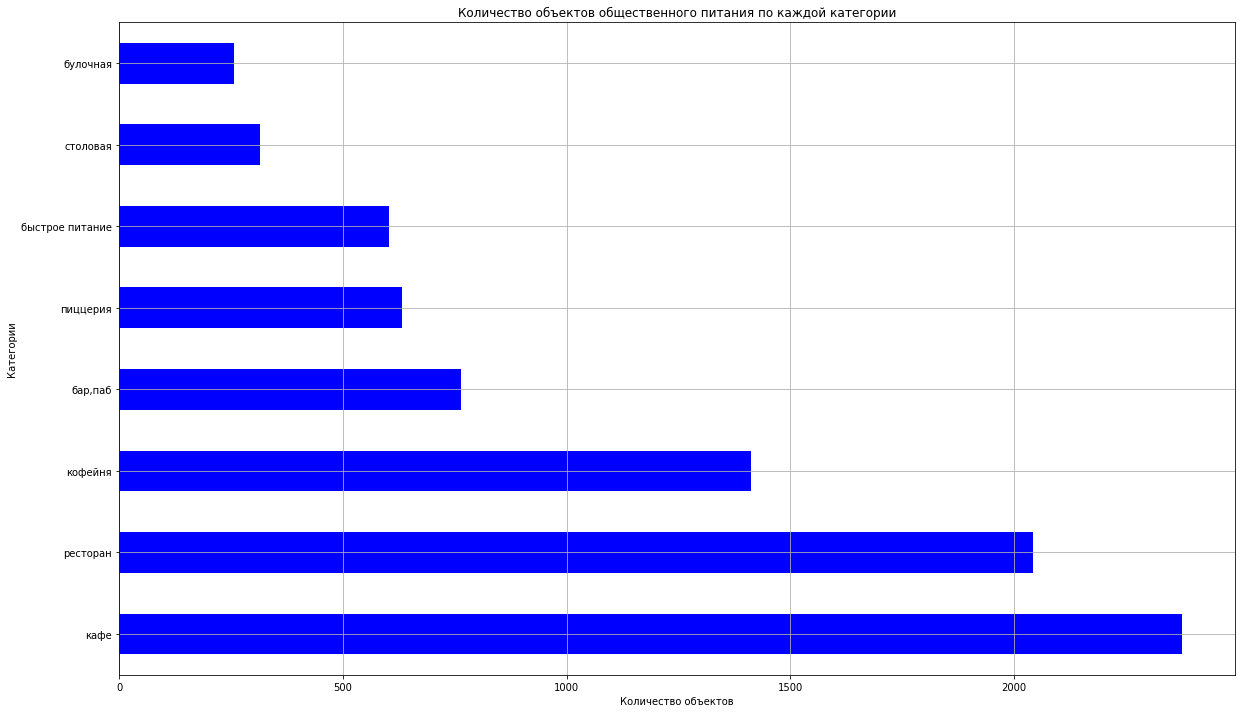

кафе               0.282790
ресторан           0.243037
кофейня            0.168174
бар,паб            0.090931
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: category, dtype: float64


In [33]:
df['category'].value_counts().plot(kind='barh', figsize = (20, 12), title = 'Количество объектов общественного питания по каждой категории',
                        legend=False,
                        color='blue')
plt.xlabel('Количество объектов')
plt.ylabel('Категории')
plt.grid()
plt.show()
pivot_sales = pd.pivot_table(df,
                             index= 'category',
                             values="id",
                             aggfunc="count")

#print(pivot_sales.sort_values(by='id'))
print(df['category'].value_counts(normalize=True))

Как видно лидируют кафе и рестораны, булочные и столовые отстают


###  Исследование распределения количества заведений по административным районам Москвы, а также отдельно распределения заведений каждой категории в Центральном административном округе Москвы

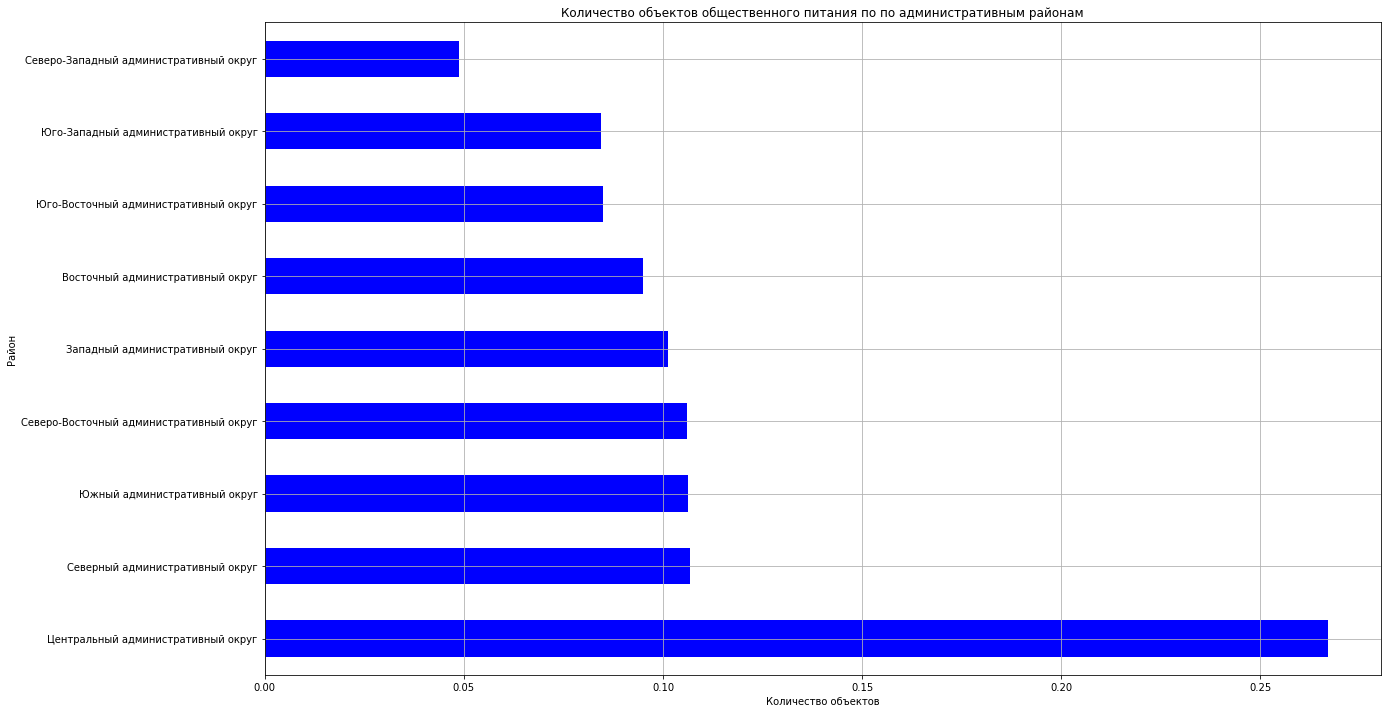

Центральный административный округ         0.266841
Северный административный округ            0.106879
Южный административный округ               0.106165
Северо-Восточный административный округ    0.105927
Западный административный округ            0.101166
Восточный административный округ           0.094977
Юго-Восточный административный округ       0.084980
Юго-Западный административный округ        0.084385
Северо-Западный административный округ     0.048679
Name: district, dtype: float64


In [34]:
df['district'].value_counts(normalize=True).plot(kind='barh', figsize = (20, 12), title = 'Количество объектов общественного питания по по административным районам',
                        legend=False,
                        color='blue')
plt.xlabel('Количество объектов')
plt.ylabel('Район')
plt.grid()
plt.show()
pivot_sales = pd.pivot_table(df,
                             index= 'district',
                             values="id",
                             aggfunc="count")

#print(pivot_sales.sort_values(by='id'))
print(df['district'].value_counts(normalize=True))

В центральном районе больше чем в два заведений по сравнению с остальными

вывод можно сделать следующий больше 25 проццентов заведений общепита расположены в центральном районе, в северо западном же меньше всего около 5 процентоа. те Центральный район нам интересне с точки зрения исследовательского аналлиза. В остальных районах заведения рапределеныы плюч минус равномерено по 9-10 процентов

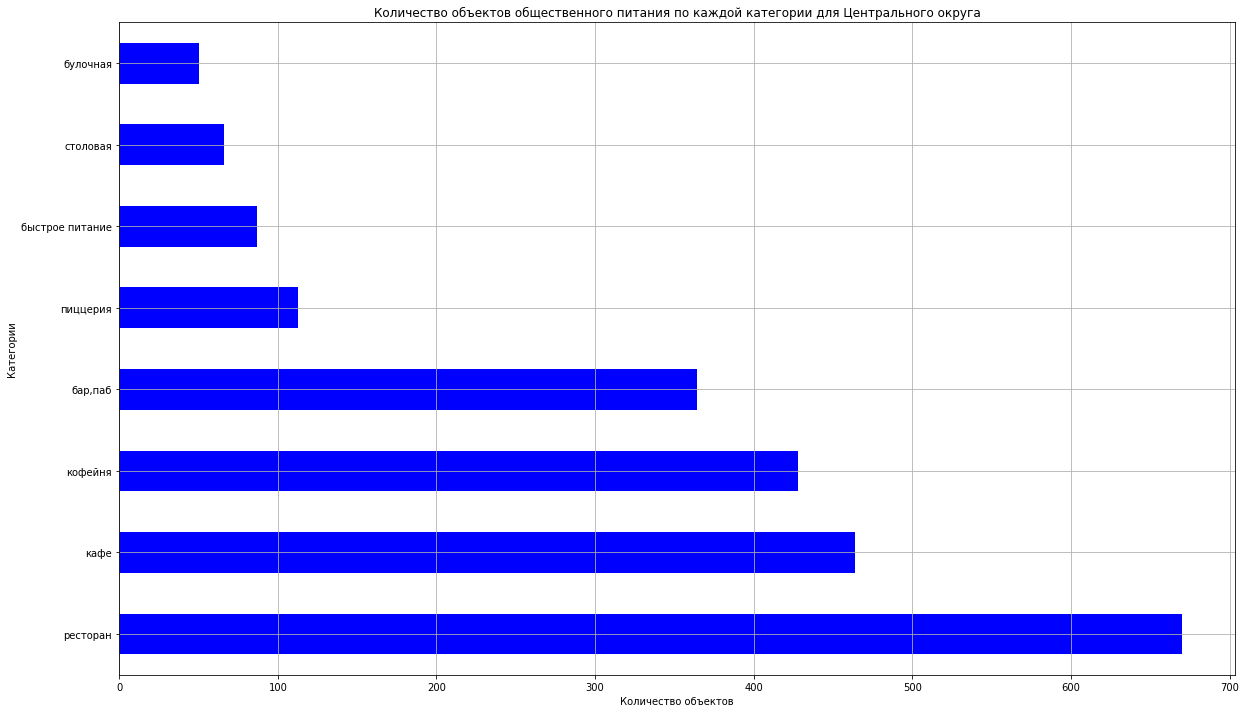

                  id
category            
булочная          50
столовая          66
быстрое питание   87
пиццерия         113
бар,паб          364
кофейня          428
кафе             464
ресторан         670


In [35]:
df[df['district'] == 'Центральный административный округ']['category'].value_counts().plot(kind='barh', figsize = (20, 12), 
                        title = 'Количество объектов общественного питания по каждой категории для Центрального округа',
                        legend=False,
                        color='blue')
plt.xlabel('Количество объектов')
plt.ylabel('Категории')
plt.grid()
plt.show()
pivot_sales = pd.pivot_table(df[df['district'] == 'Центральный административный округ'],
                             index= 'category',
                             values="id",
                             aggfunc="count")

print(pivot_sales.sort_values(by='id'))

Ресторанов много в центре, кафе, бары кофейни на уровне, остальное сильно меньше, особенно булочные


### Исследование соотношения сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.


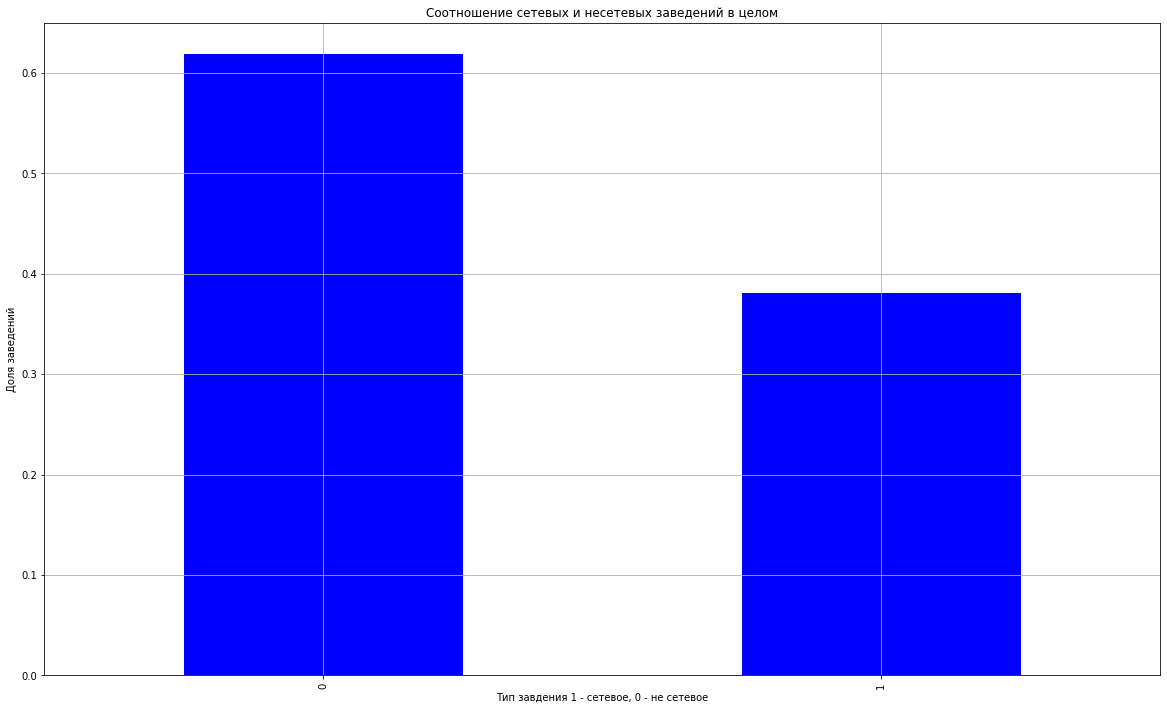

         id
chain      
1      3203
0      5199


In [36]:
df['chain'].value_counts(normalize=True).plot(kind='bar', figsize = (20, 12), title = 'Cоотношение сетевых и несетевых заведений в целом',
                        legend=False,
                        color='blue')
plt.xlabel('Тип завдения 1 - сетевое, 0 - не сетевое')
plt.ylabel('Доля заведений')
plt.grid()
plt.show()
pivot_sales = pd.pivot_table(df,
                             index= 'chain',
                             values="id",
                             aggfunc="count")

print(pivot_sales.sort_values(by='id'))

**В разрезе категорий**

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, бар,паб to столовая
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8 non-null      float64
 1   1       8 non-null      float64
dtypes: float64(2)
memory usage: 192.0+ bytes
None


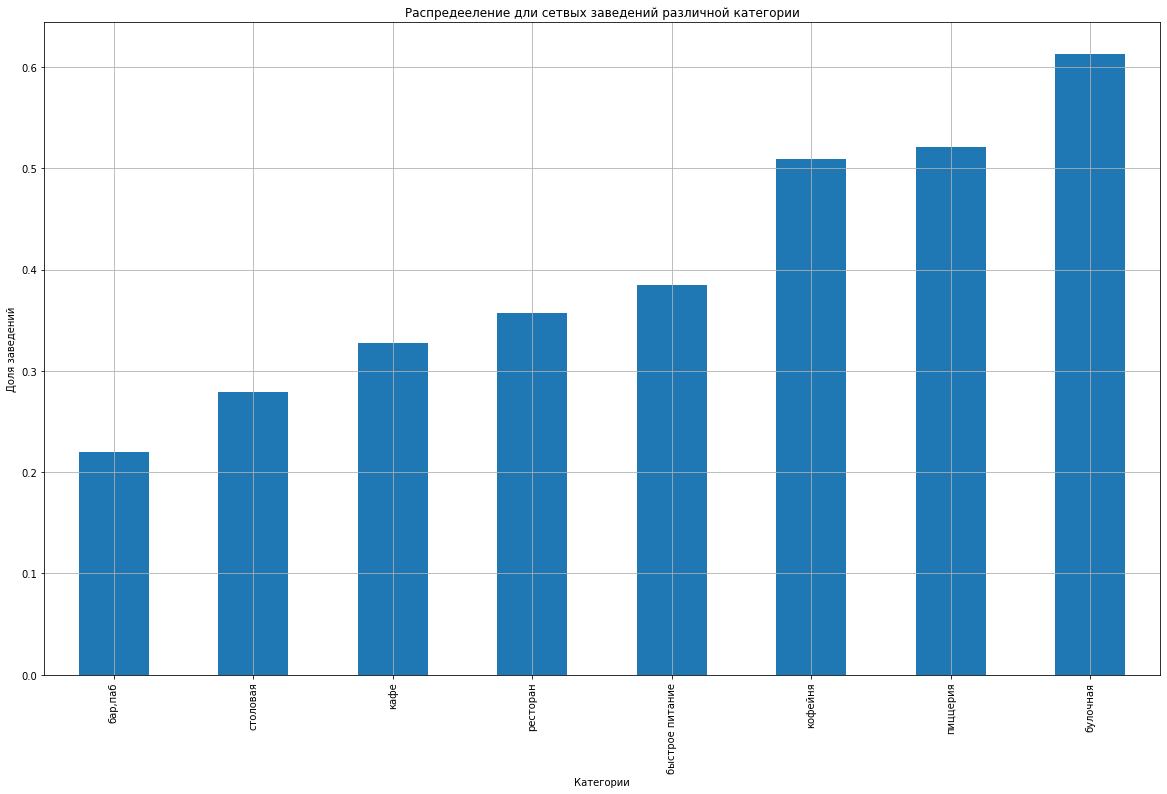

chain               0    1
category                  
бар,паб           596  168
булочная           99  157
быстрое питание   371  232
кафе             1597  779
кофейня           693  720
пиццерия          303  330
ресторан         1313  729
столовая          227   88


In [37]:
df_unstack = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)
print(df_unstack.info())
df_unstack[1].sort_values().plot(kind='bar', figsize = (20, 12))

plt.title('Распредееление дли сетвых заведений различной категории')
plt.xlabel('Категории')
plt.ylabel('Доля заведений')
plt.grid()
plt.show()

pivot_sales = pd.pivot_table(df,
                             index= 'category',
                             columns='chain',
                             values = 'id',
                             aggfunc="count")

print(pivot_sales)

Как можно заметить сетевых заведений меньше чем несетевых в 1.6 раз

---

### Исследование количества посадочных мест в заведениях


Для начала посмотрим на распределение посадочныых мест, также держим в голове что больше заведений имеет пропуски

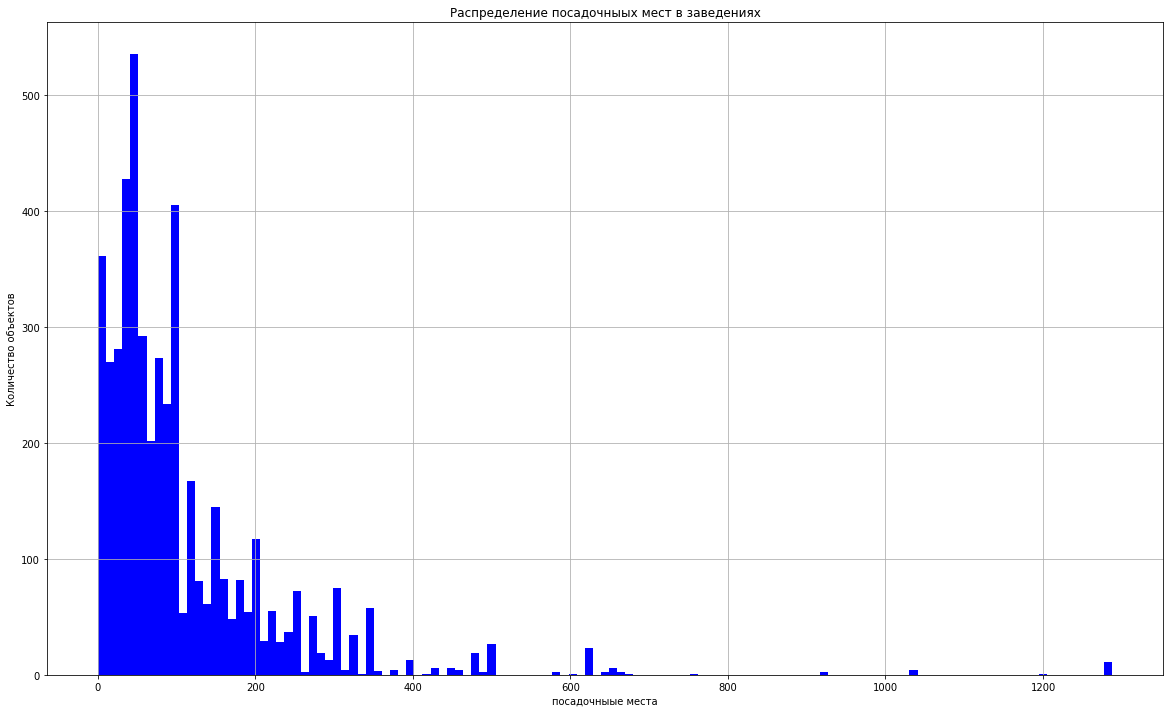

In [38]:
df['seats'].plot(kind='hist',bins=125, figsize = (20, 12), title = 'Распределение посадочныых мест в заведениях',
                        legend=False,
                        color='blue')
plt.xlabel('посадочныые места')
plt.ylabel('Количество объектов')
plt.grid()
plt.show()

Так ну видно что картину портит наш значение индикатор, не учитываем -1

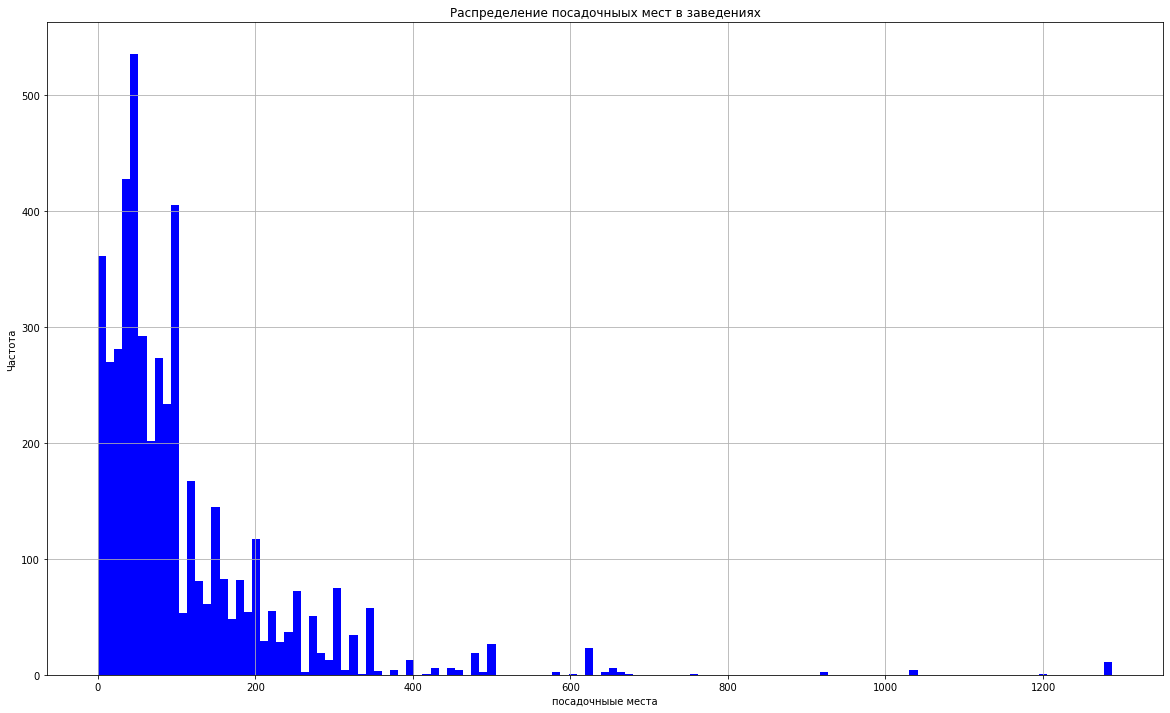

In [39]:
df[df['seats']!=-1]['seats'].plot(kind='hist',bins=125, figsize = (20, 12), title = 'Распределение посадочныых мест в заведениях',
                        legend=False,
                        color='blue')
plt.xlabel('посадочныые места')
plt.ylabel('Частота')
plt.grid()
plt.show()

Можно заметить что распределение не нормальное, а смещенное влево, построим график с усами

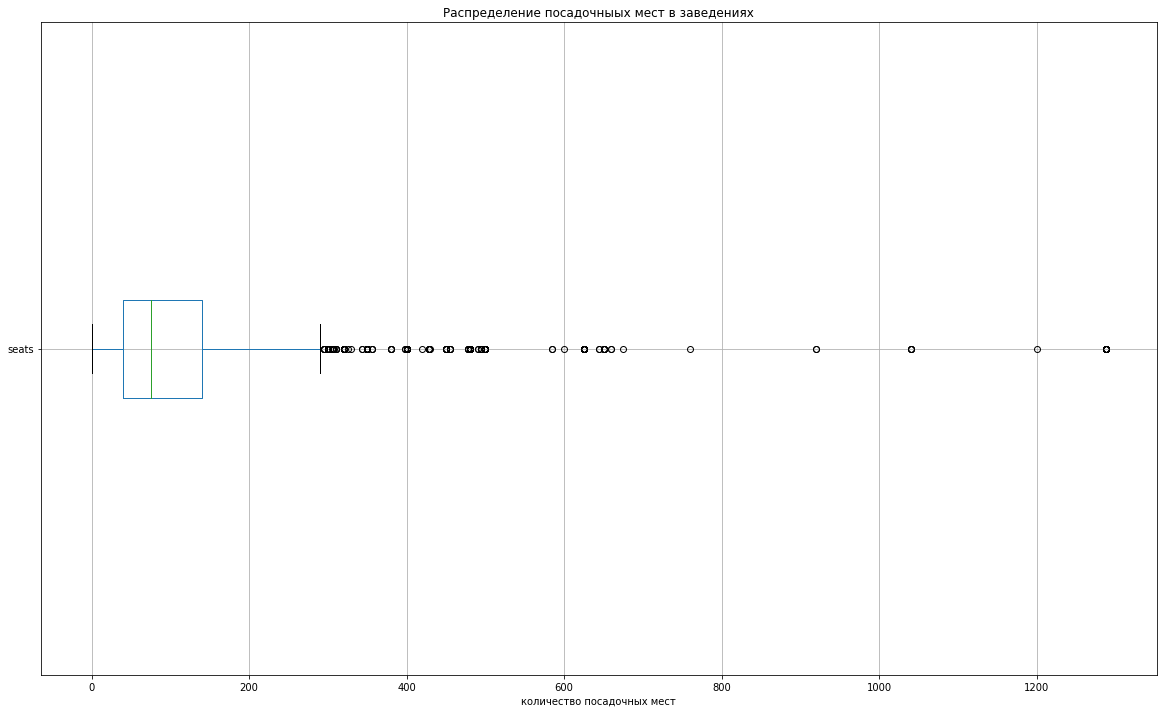

count    4792.000000
mean      108.361435
std       122.841133
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64


In [40]:
plt.figure(figsize=(20, 12))
df[df['seats']!=-1].boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение посадочныых мест в заведениях')
plt.xlabel('количество посадочных мест')

# Выводим график
plt.show()
print(df[df['seats']!=-1]['seats'].describe())

Видим выбросы есть 

есть место где 1288 посадочных мест - безумно много. Ну как я уже сказал сильное смещение влево, среднее в два раза больше медианы так ну iqr=100 q3=140 посмотрим на то что выше 100+140=240

In [41]:
print(df[df['seats']>240].sort_values(by='seats').tail(20))
print(df[df['seats']>240]['seats'].count())


                                    id                name         category  \
7987  928e4ea589354ed9a39772210209cab8            ресторан         ресторан   
5486  d355bd6aaadc4bacb006347f0662e196                 дом             кафе   
4180  77141ea2e18e4f06867b6fef81f2aae4              eataly          бар,паб   
4245  1444de238c0f4de8a1de18ed0cb418f7      стейк & бургер             кафе   
2966  6b611f2fc2084078952aaef40780f11c            матрешка             кафе   
2770  4c196f841b0046b3ab3a60d3ed52bfc5         шоколадница          кофейня   
2722  4731af3e68bb449fb2b34493fadfaed1           маргарита  быстрое питание   
2713  8d07e2d1810b4dca9d4cb247d0335df3         ваня и гоги          бар,паб   
4231  30d6c2abb42748bb98c01b1ed366e253  рестобар argomento         столовая   
6641  0508ba663a4c42d1b5068e51afcc26ef    one price coffee          кофейня   
6684  6287fb9811434558a4ada0ae08be9c04     пивной ресторан          бар,паб   
6690  f9e4ec2d1e5946cf83c9564b2d06acd6      японская

Ну честно есть подорзрения, что что-то не так аж 474 заведения попадает в категорию выбросов
ну 200 мест норм особенно для лета с терассой, как бы и 400 наврное и 600 но не 1288 причем одинаковое количесвто для 11 мест а потом также подозрительно 1040, ну вот честнно все что выше 700 я бы не учитыывал в анализе. Есть предположение что быть может это каки-то фуд зоны и пространства с общими посадочными которые и портят статистику ну будем учитвать для дальнейшего исследования все что выше 675

category
бар,паб            82.0
булочная           50.0
быстрое питание    65.0
кафе               60.0
кофейня            80.0
пиццерия           55.0
ресторан           86.0
столовая           75.5
Name: seats, dtype: float32


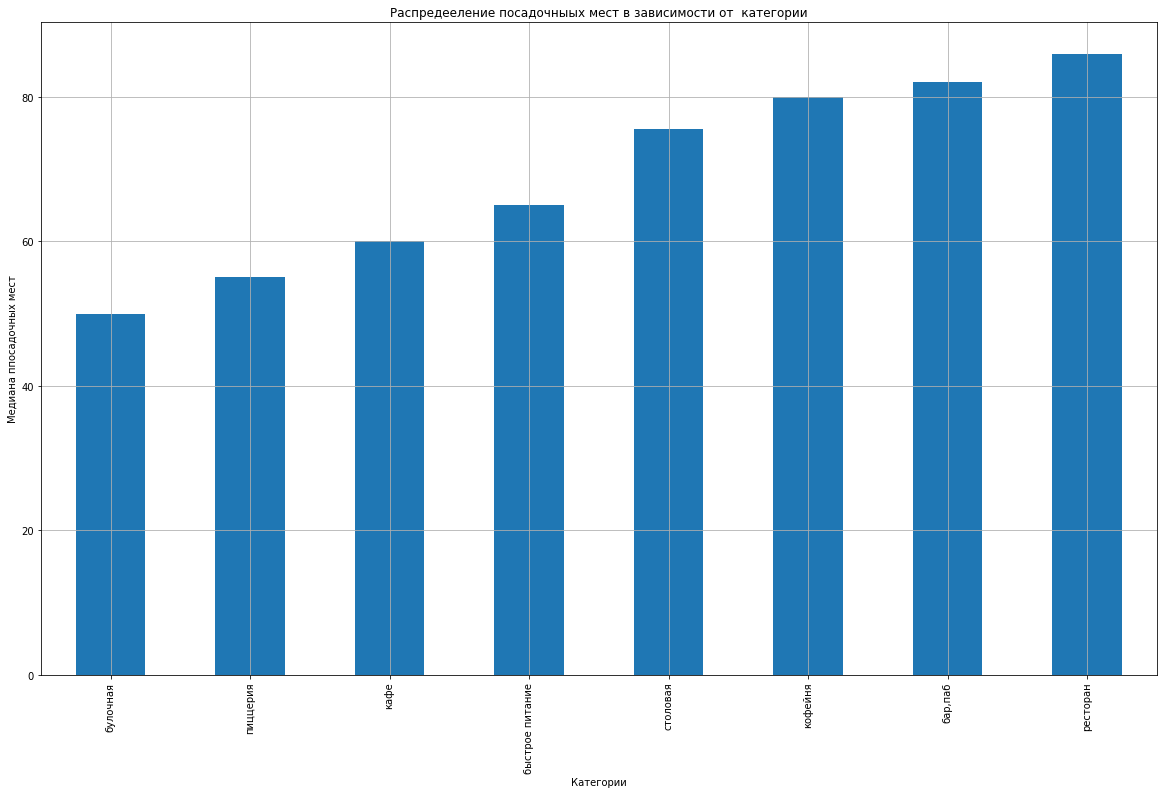

In [44]:
print(df.groupby('category')['seats'].median())
df.groupby('category')['seats'].median().sort_values().plot(kind='bar', figsize = (20, 12))

plt.title('Распредееление посадочныых мест в зависимости от  категории')
plt.xlabel('Категории')
plt.ylabel('Медиана ппосадочных мест')
plt.grid()
plt.show()

Стоит отметить что медиана посадочных мест больше всего в ресторане, ьаре и кофейнях, я думаю вот эта гипотеза имеет место быть сильно много у ккофеен посадочных мест а чаще всего они на вынос вобще, а меньше всего у булочных и пиццерий

---

### Исследование рейтинга заведений

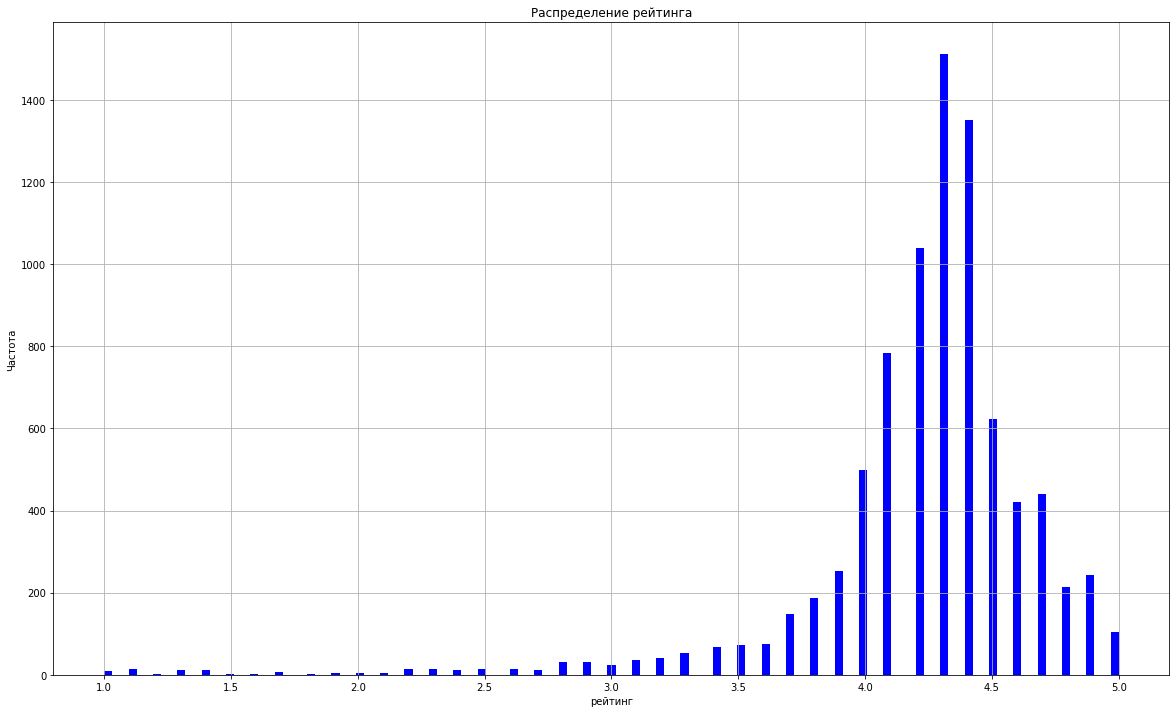

count    8402.000000
mean        4.230016
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64


In [45]:
df['rating'].plot(kind='hist',bins=125, figsize = (20, 12), title = 'Распределение рейтинга',
                        legend=False,
                        color='blue')
plt.xlabel('рейтинг')
plt.ylabel('Частота')
plt.grid()
plt.show()

print(df['rating'].describe())

category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.124285
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290401
столовая           4.211429
Name: rating, dtype: float32


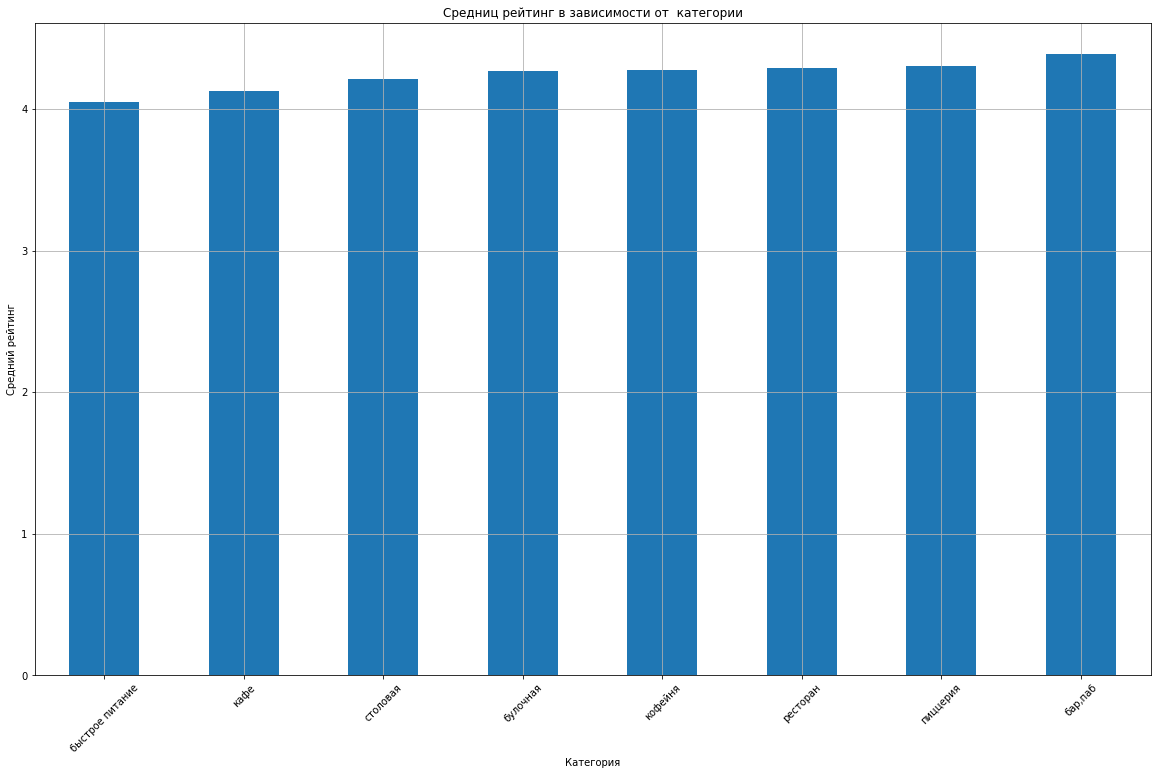

In [47]:
print(df.groupby('category')['rating'].mean())
df.groupby('category')['rating'].mean().sort_values().plot(kind='bar', figsize = (20, 12), rot='45')

plt.title('Средниц рейтинг в зависимости от  категории')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.grid()
plt.show()

Как видно в целом средний рейтинг у всех категорий завдений больше четырех, максимальный рейтинг в барах и пицццериях, наименьшнй у кафе и ресторанов быстрого питания

---

### Исследовакние -  с какими данными показывают самую сильную корреляцию рейтинги заведений

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k 
            rating  category  district     chain     seats     price   is_24_7
rating    1.000000  0.198739  0.189453  0.118857  0.000000  0.262056  0.161010
category  0.198739  1.000000  0.174584  0.266000  0.048923  0.566933  0.244815
district  0.189453  0.174584  1.000000  0.064473  0.352440  0.202787  0.076357
chain     0.118857  0.266000  0.064473  1.000000  0.056523  0.218211  0.043488
seats     0.000000  0.048923  0.352440  0.056523  1.000000  0.088146  0.043193
price     0.262056  0.566933  0.202787  0.218211  0.088146  1.000000  0.084183
is_24_7   0.161010  0.244815  0.076357  0.043488  0.043193  0.084183  1.000000


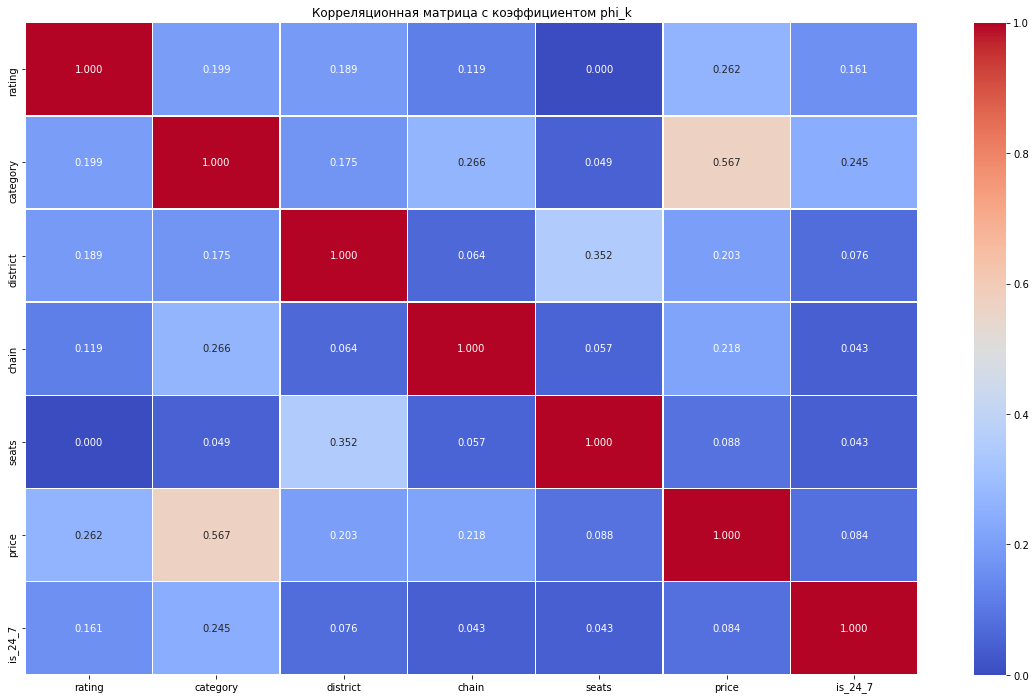

In [48]:
corr_columns = [
    'rating',
    'category',
    'district',
    'chain',
    'seats',
    'price',
    'is_24_7'
]
correlation_matrix = df[corr_columns].phik_matrix()

# Выводим результаты
print('Корреляционная матрица с коэффициентом phi_k ')
print(correlation_matrix) 
plt.figure(figsize=(20, 12))
sns.heatmap(data=correlation_matrix, annot=True, fmt='.3f', linewidths=0.5, cmap='coolwarm') # Постройте тепловую карту

plt.title('Корреляционная матрица с коэффициентом phi_k')
plt.show()

самая сильная связь категория-цена, если расмматривать только свзяи рейтинга то цены и рейтинга рассмотри обе

In [49]:
df.groupby('price')['rating'].mean().sort_values()

price
низкие           4.173077
средние          4.297874
выше среднего    4.386348
высокие          4.436611
Name: rating, dtype: float32

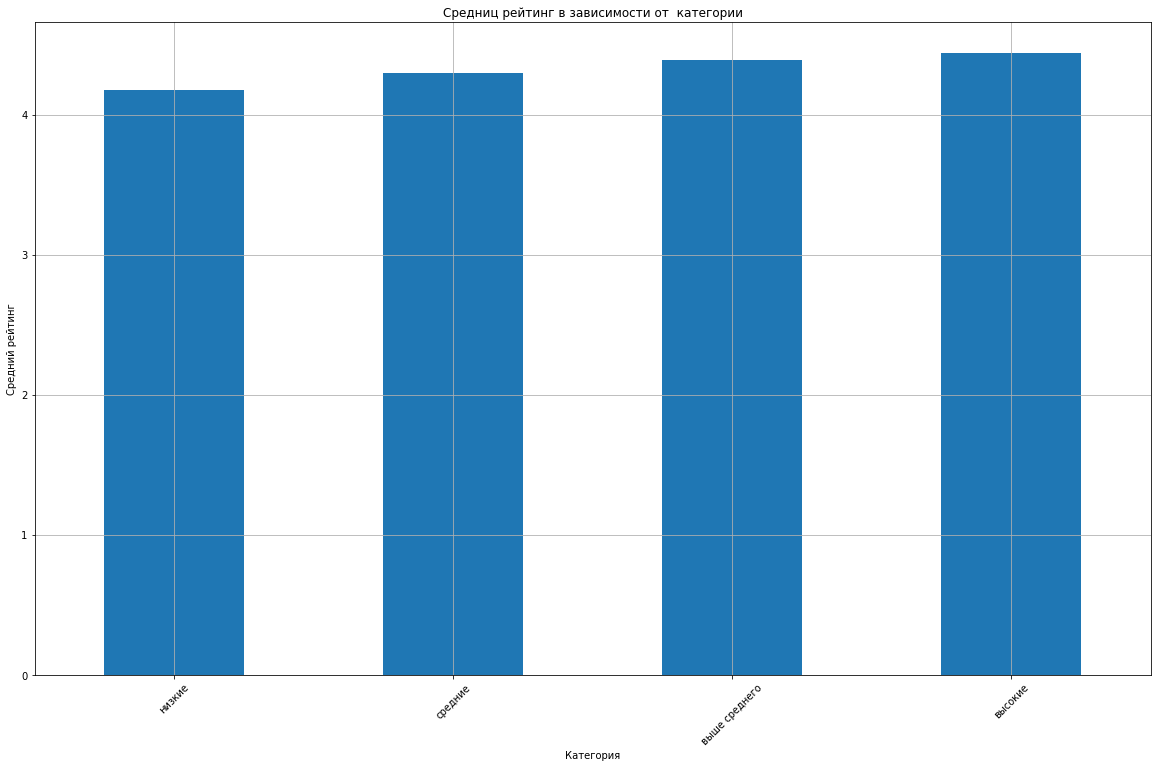

In [50]:
df.groupby('price')['rating'].mean().sort_values().plot(kind='bar', figsize = (20, 12), rot='45')

plt.title('Средниц рейтинг в зависимости от  категории')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.grid()
plt.show()

Можно заметить что чем выше цены в заведении тем выше рейтинг, я думаю тут все логично чем больше сервисоориентровано завдение тем выше там обычно ценыю рейтинг как показатель спроса, цены - предложения, спрос рождет предложеение

---

### топ-15 популярных сетей в Москве

                                              count      mean
                                             rating    rating
name                                category                 
кофемания                           кофейня      22  4.463636
drive café                          кафе         24  4.025000
буханка                             булочная     25  4.416000
чайхана                             кафе         26  3.946154
cofefest                            кофейня      31  3.977419
теремок                             ресторан     36  4.105556
кулинарная лавка братьев караваевых кафе         39  4.394872
кофепорт                            кофейня      42  4.147619
prime                               ресторан     49  4.114285
cofix                               кофейня      65  4.075385
яндекс лавка                        ресторан     69  3.872464
one price coffee                    кофейня      71  4.064789
додо пицца                          пиццерия     74  4.286487
домино'с

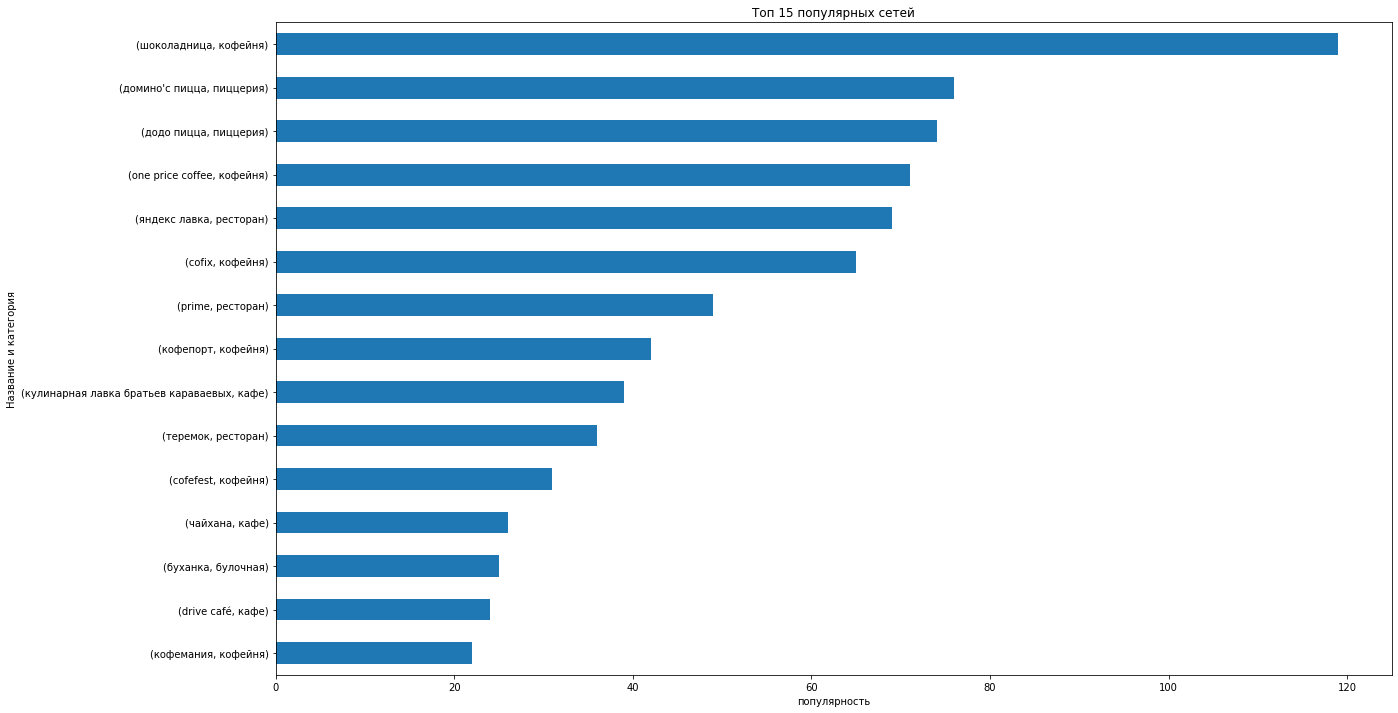

In [51]:
pivot_sales = pd.pivot_table(df[df['chain'] == 1],
                             index= ['name', 'category'],
                             values='rating',
                             aggfunc=['count', 'mean'])
top15 = pivot_sales.sort_values(by=('count', 'rating')).tail(15)
print(top15)
top15[('count', 'rating')].plot(kind='barh', legend=False, xlabel='Название и категория', ylabel='популярность',
                 title='Топ 15 популярных сетей',figsize = (20, 12))

plt.xlabel('популярность')
plt.show()

<AxesSubplot:title={'center':'Значения среднего рейтинга для Топ 15 популярных сетей'}, ylabel='Название и категория'>

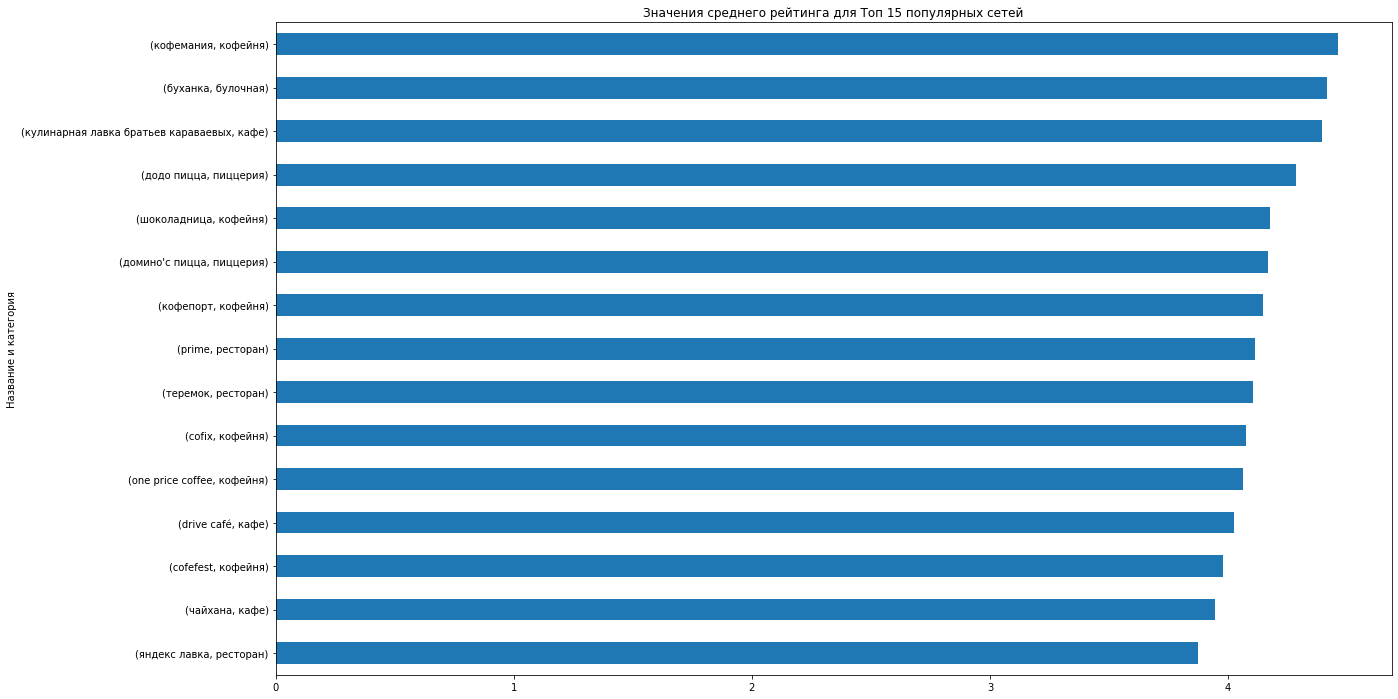

In [52]:
top15[('mean', 'rating')].sort_values().plot(kind='barh', legend=False, xlabel='Название и категория', ylabel='популярность',
                 title='Значения среднего рейтинга для Топ 15 популярных сетей',figsize = (20, 12))

посмотрим на категории, которые попали в топ

category
булочная    1
пиццерия    2
кафе        3
ресторан    3
кофейня     6
Name: (count, rating), dtype: int64


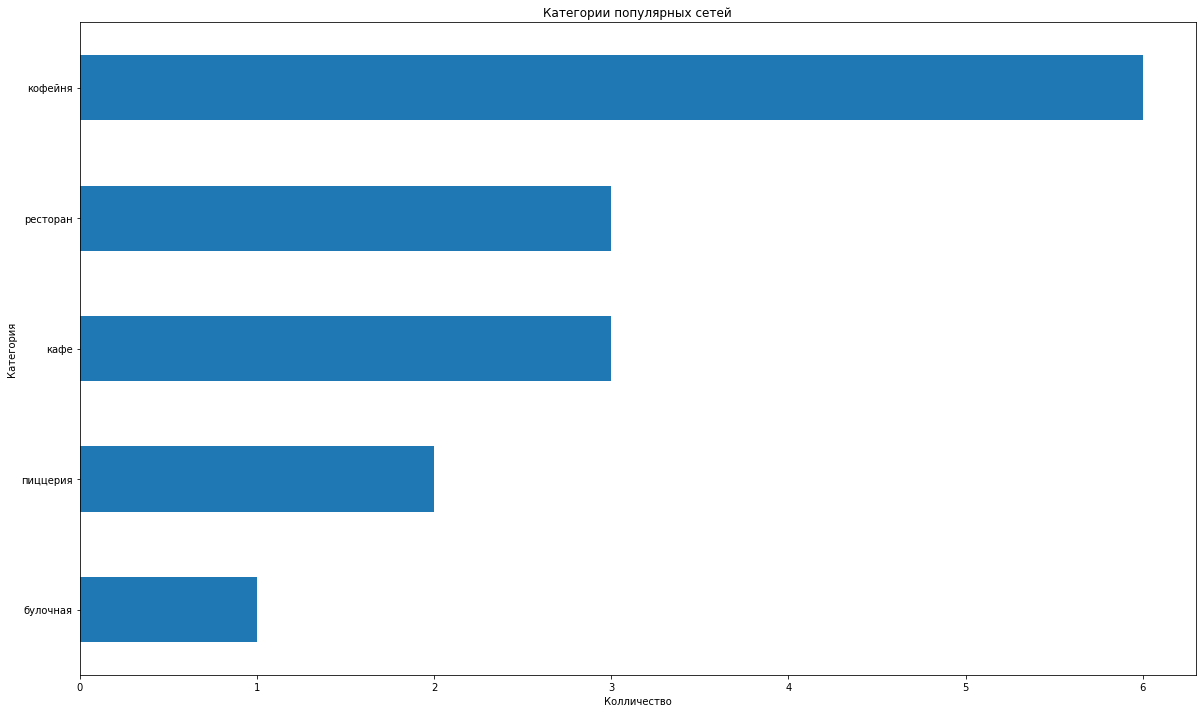

In [53]:
top15_category = top15[('count', 'rating')].groupby('category').count().sort_values()
print(top15_category)
top15_category.plot(kind='barh',
                 title='Категории популярных сетей',figsize = (20, 12))
plt.ylabel('Категория')
plt.xlabel('Колличество')
plt.show()

Мы видим что наиболее популярными являются сети кофеин, можно заметить что нет столовых или пабов, при этом рейтинг у всех попавших в топ либо выыше либо почти равен 4, есть сети с рейтингом под 4.5 но это не прям супер рейтинг, в большой сеети сложно поддержиивать хороший сервис  и высокие оценки

---

### Анаклиз цены в Центральном административном округе и других.


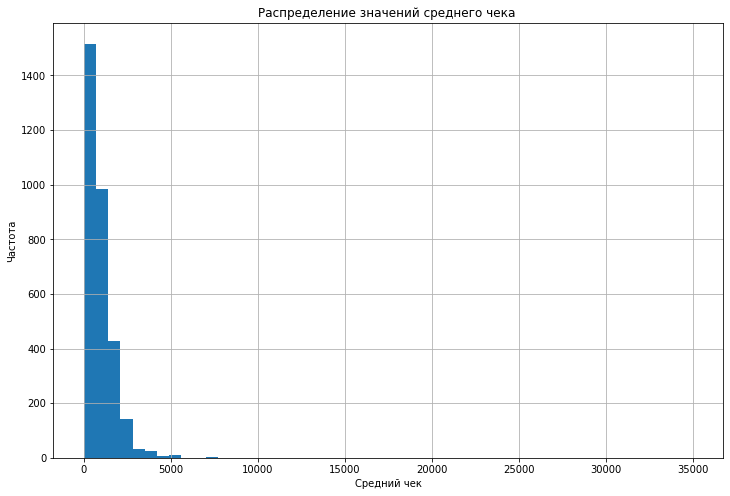

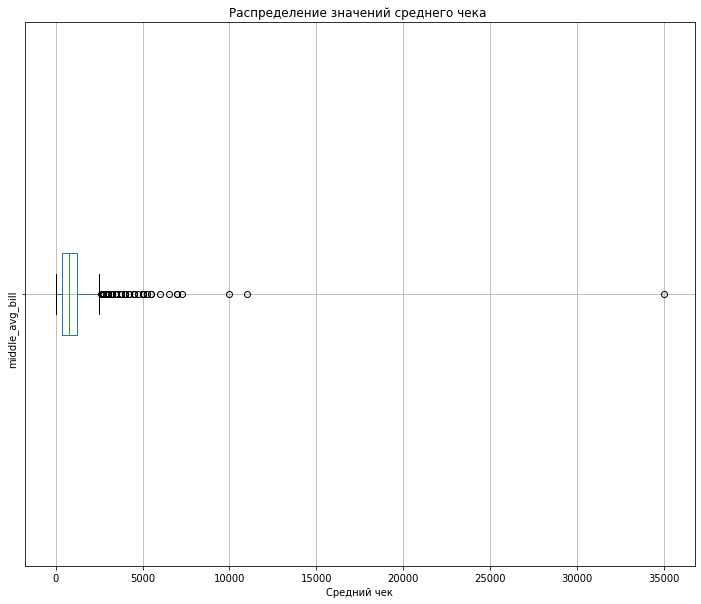

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64


In [56]:
df['middle_avg_bill'].plot(kind='hist', bins = 50,grid=True, figsize=(12, 8), subplots=True) 
plt.title("Распределение значений среднего чека ")
plt.ylabel('Частота')
plt.xlabel('Средний чек')
plt.show()
    
#df.groupby('district')['middle_avg_bill'].boxplot(vert=False, grid=False, figsize=(12, 10), rot ='90')
boxplot = df.boxplot(column='middle_avg_bill',
                     vert=False, 
                     figsize=(12, 10), rot ='90')
plt.title("Распределение значений среднего чека ")
plt.ylabel('')
boxplot.set_xlabel('Cредний чек')

plt.show()

print(df['middle_avg_bill'].describe())

 Здесь мы впервый раз и сразу можем увидеть что есть выбросы среднего чека в каком-то заведении средний чек аж 35 тысяч, тут можно подумать что быть может так дорого где-то в центре но потом узннаем что это не так, распределение смещено в лево, далековато от нормального, в общем средний чек в среднем составляет 1000 медиана 750

In [57]:
df_inf = df.groupby('district')['middle_avg_bill'].describe()
print(df_inf)

                                          count         mean          std  \
district                                                                    
Восточный административный округ          260.0   820.626923   850.903310   
Западный административный округ           306.0  1053.225490   779.008536   
Северный административный округ           322.0   927.959627   912.609221   
Северо-Восточный административный округ   301.0   716.611296   591.232153   
Северо-Западный административный округ    157.0   822.222930   595.055218   
Центральный административный округ       1060.0  1191.057547   920.014707   
Юго-Восточный административный округ      194.0   654.097938   566.825663   
Юго-Западный административный округ       235.0   792.561702   559.173122   
Южный административный округ              314.0   834.398089  2008.640596   

                                           min     25%     50%     75%  \
district                                                                 
Вост

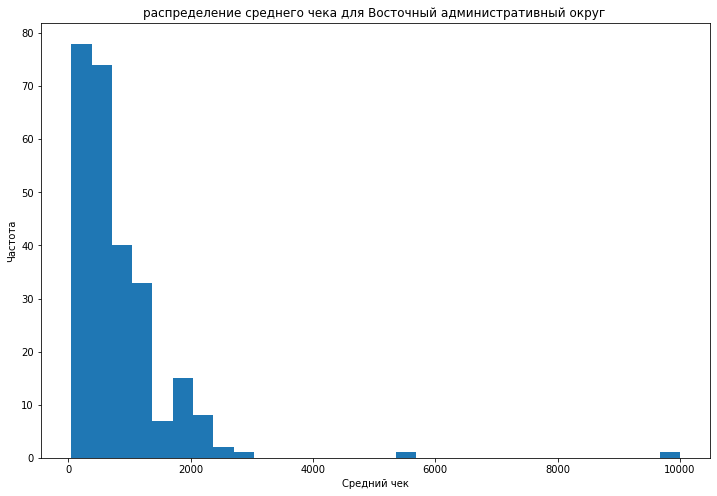

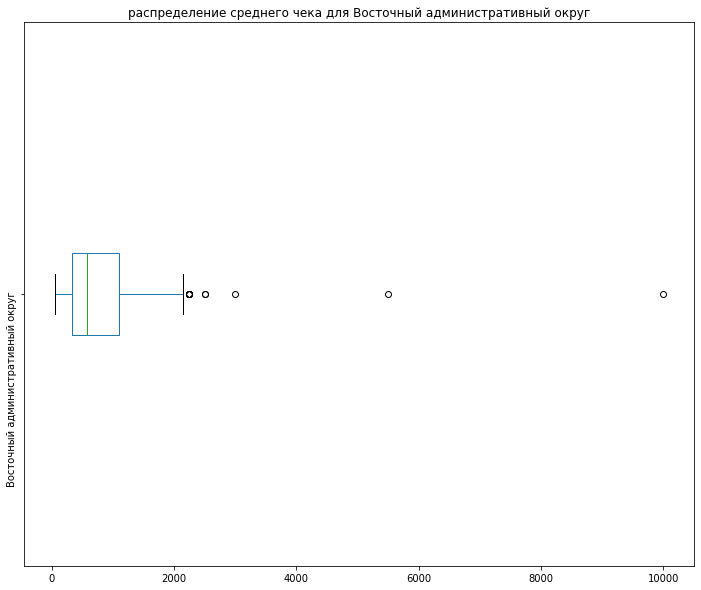

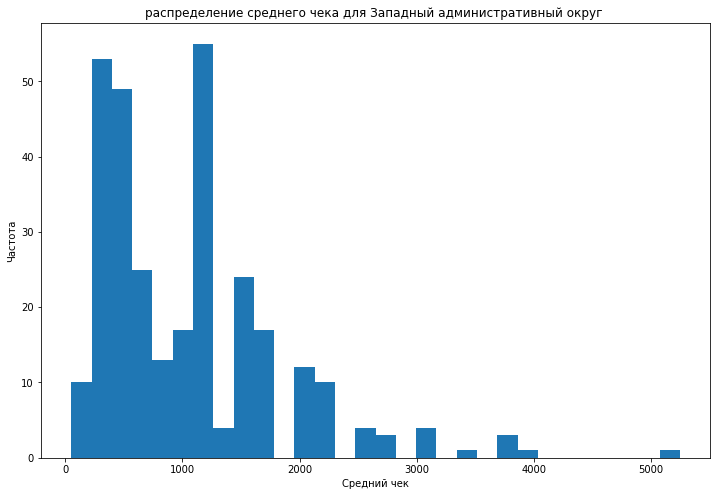

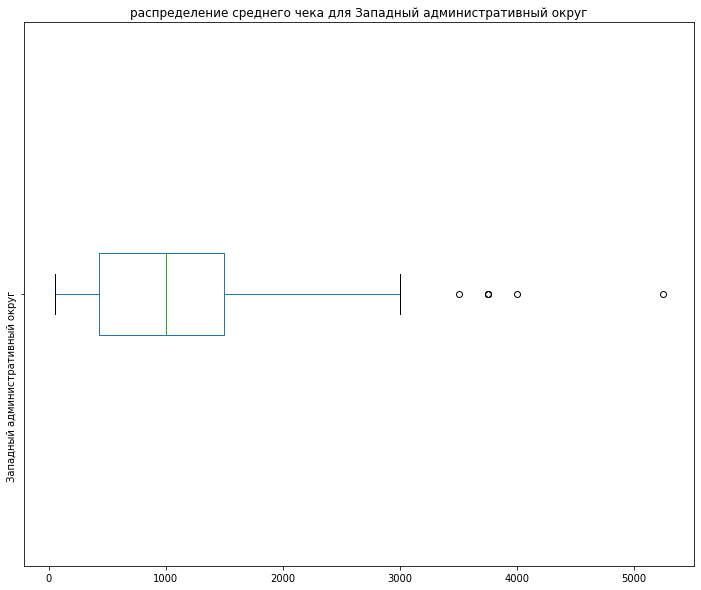

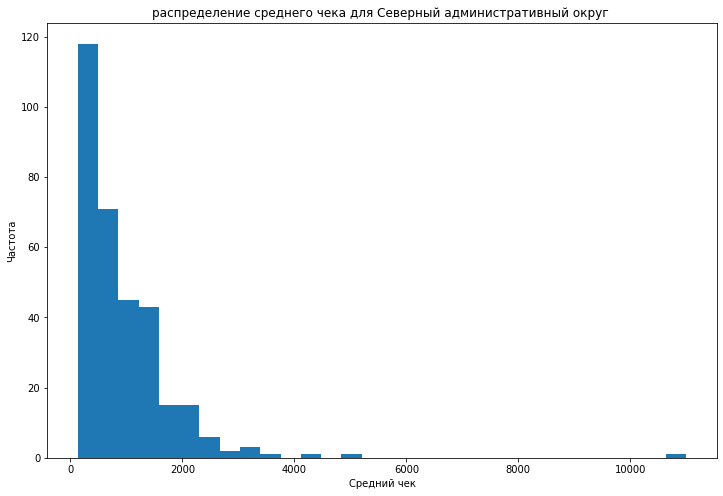

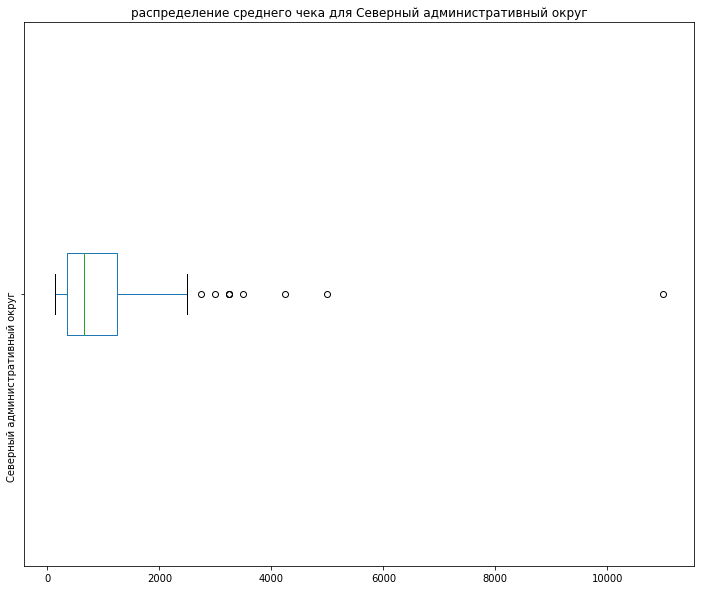

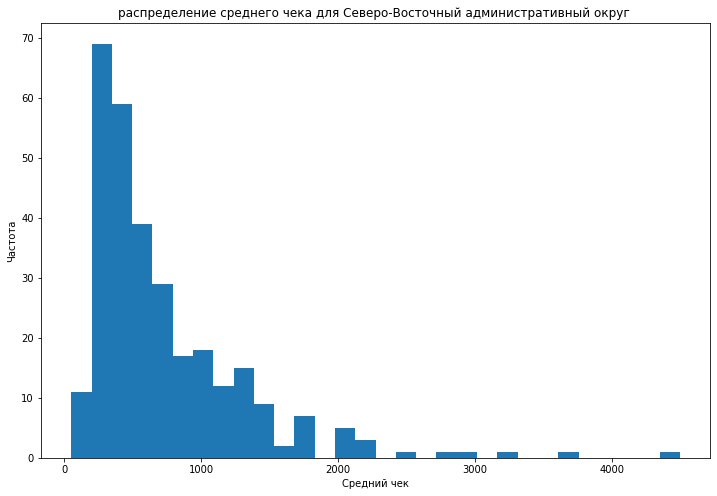

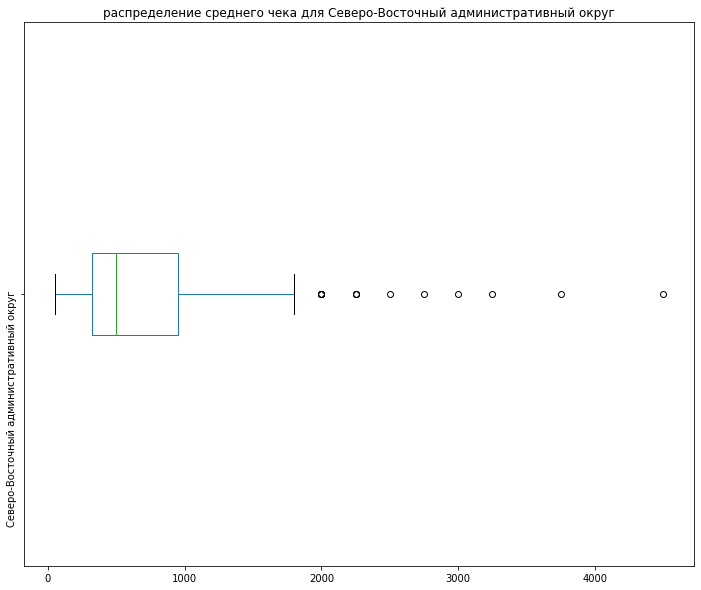

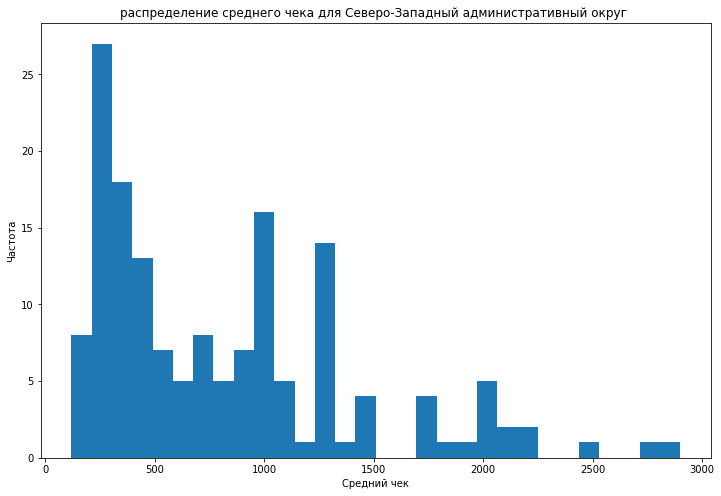

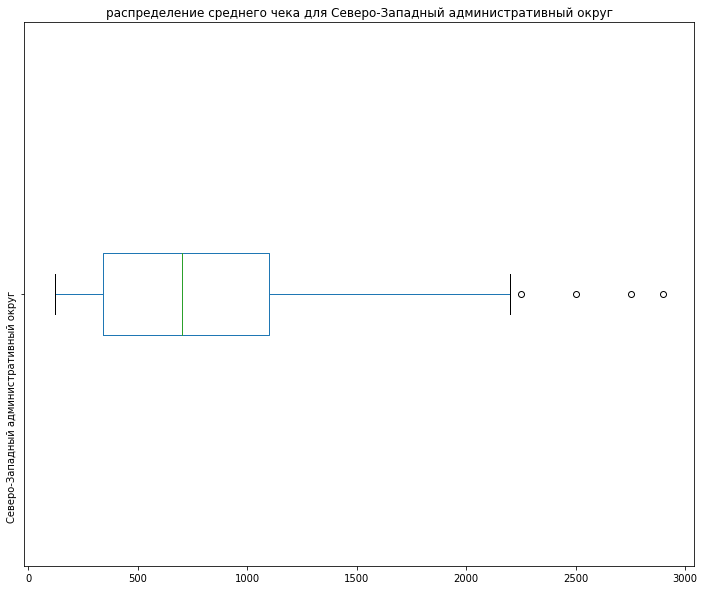

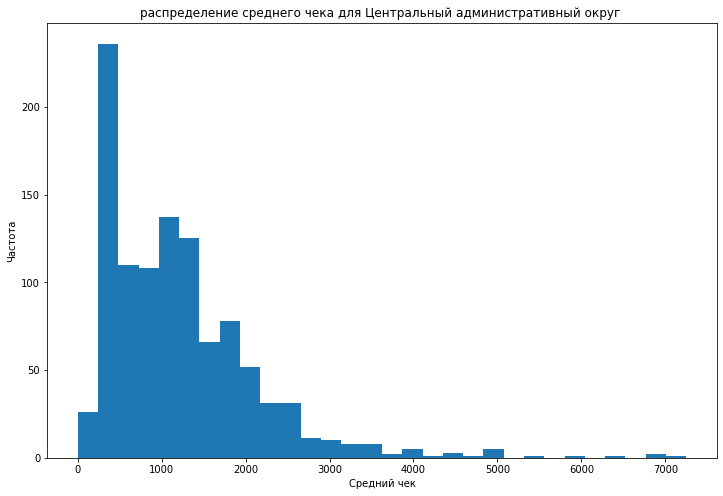

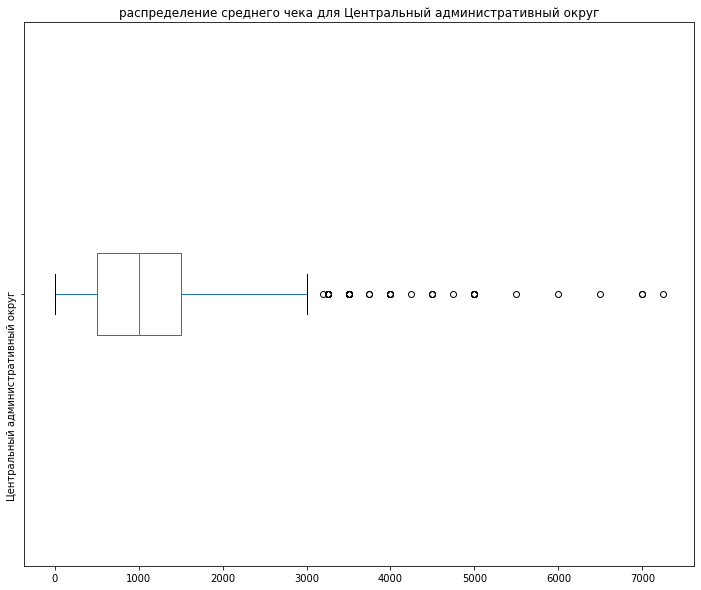

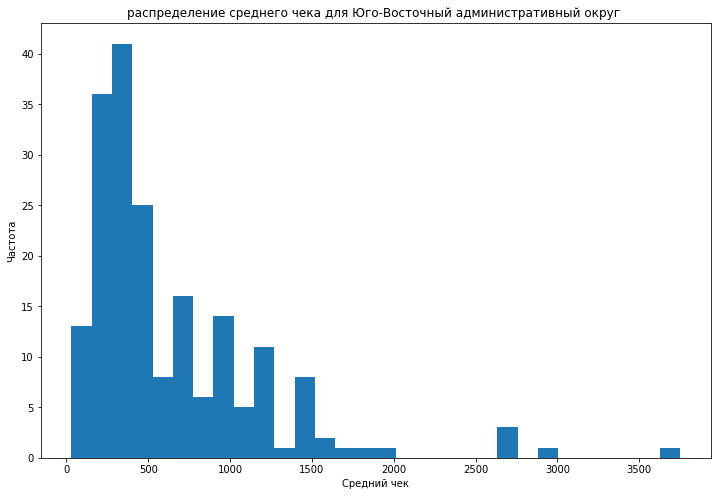

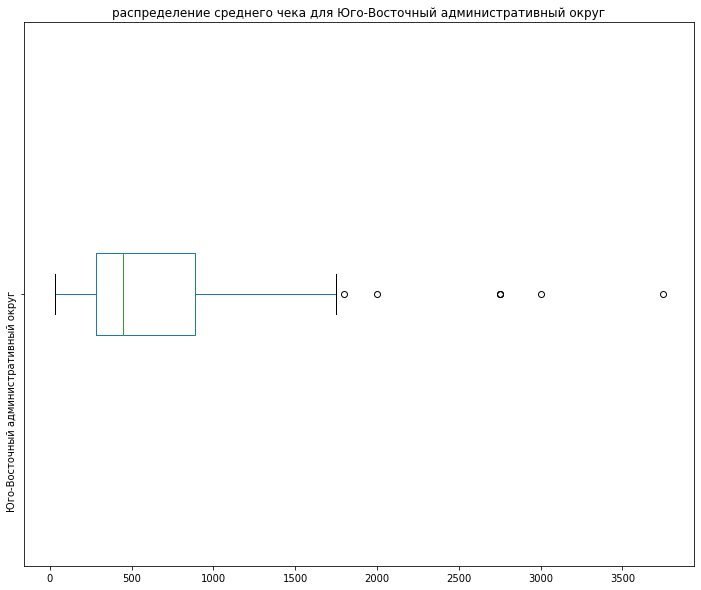

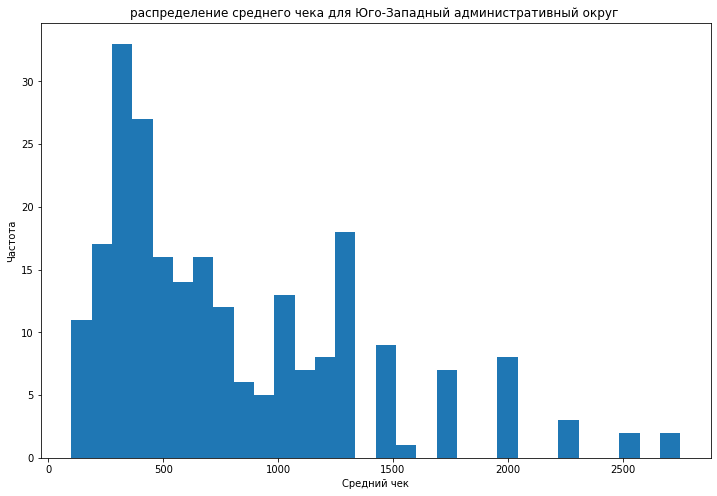

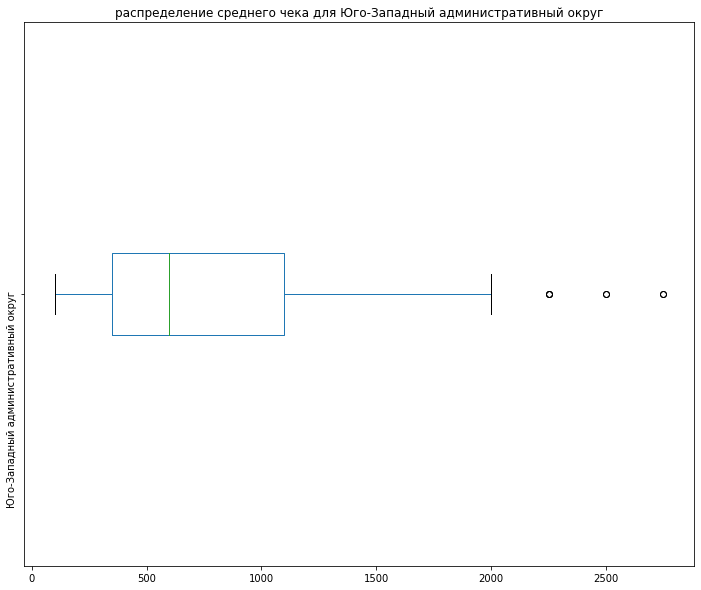

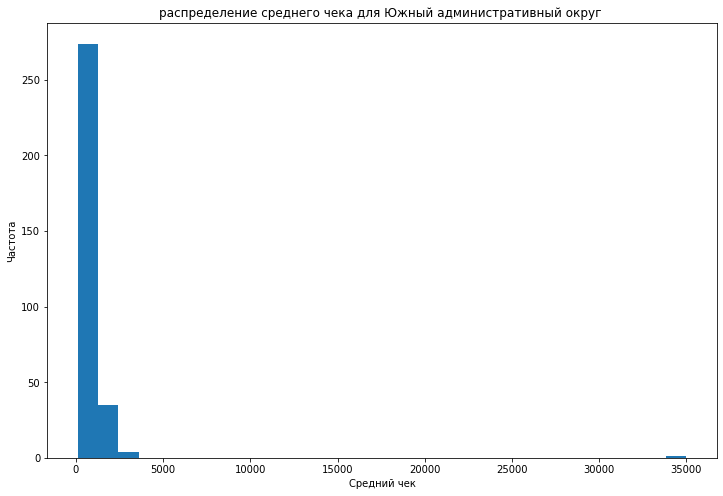

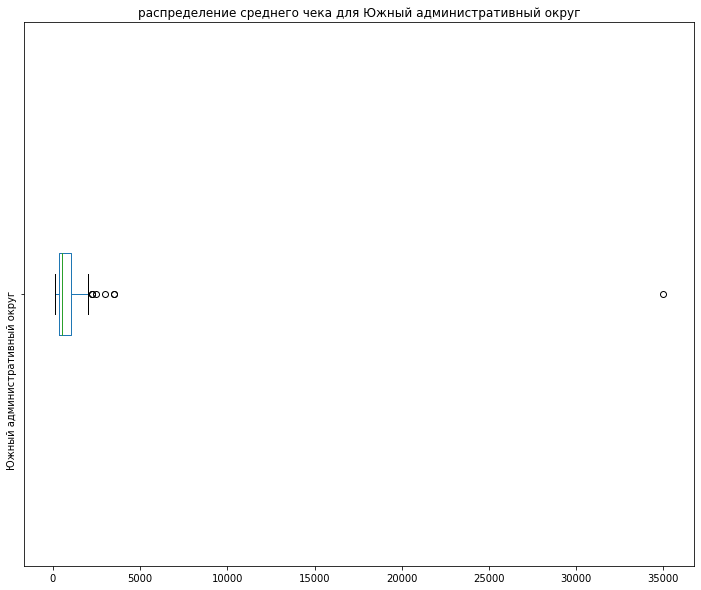

In [58]:
for name_of_d in ['Восточный административный округ', 'Западный административный округ', 'Северный административный округ',
                    'Северо-Восточный административный округ',
                     'Северо-Западный административный округ',
                 'Центральный административный округ',
                   'Юго-Восточный административный округ',
                'Юго-Западный административный округ',
                 'Южный административный округ']:
    df[df['district'] == name_of_d].groupby('district')['middle_avg_bill'].plot(kind='hist', bins = 30, figsize=(12, 8), subplots=True) 
    plt.title(f"распределение среднего чека для {name_of_d} ")
    plt.ylabel('Частота')
    plt.xlabel('Средний чек')
    plt.show()
    
    df[df['district'] == name_of_d].groupby('district')['middle_avg_bill'].plot(kind='box',vert=False,
                     grid=False,
                     figsize=(12, 10), rot ='90')
    plt.title(f"распределение среднего чека для {name_of_d}")
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

Это как я понял то что просили в начале сделать можнт я что не так опять понял

небольшие выводы Ну вот в юном районе есть аномальное заведениее сос редним чеком в 35 тысяч, возмонжно ошибка
Наиболее нормальные распределения среднего чека я бы отметил в центральном районе и в западном, тут в целом можно заметить что и средний чек повыше и его медиана. Остальные более смещенные влево. У Южного есть выбросы аномальные, но он в целом не особо интересн тк там низкий средний чек и мло заведений в цифры 10 и 7 тысяч поверить можно, например места гдле свадьбы празднуют к примеру илизаведения с готовыми сетами еды с постоянной суммой как раз около 7-10

                                            50%         mean
district                                                    
Восточный административный округ          575.0   820.626923
Западный административный округ          1000.0  1053.225490
Северный административный округ           650.0   927.959627
Северо-Восточный административный округ   500.0   716.611296
Северо-Западный административный округ    700.0   822.222930
Центральный административный округ       1000.0  1191.057547
Юго-Восточный административный округ      450.0   654.097938
Юго-Западный административный округ       600.0   792.561702
Южный административный округ              500.0   834.398089


<AxesSubplot:title={'center':'Вариация среднего чека и его медианы в зависиомости от района'}, ylabel='район'>

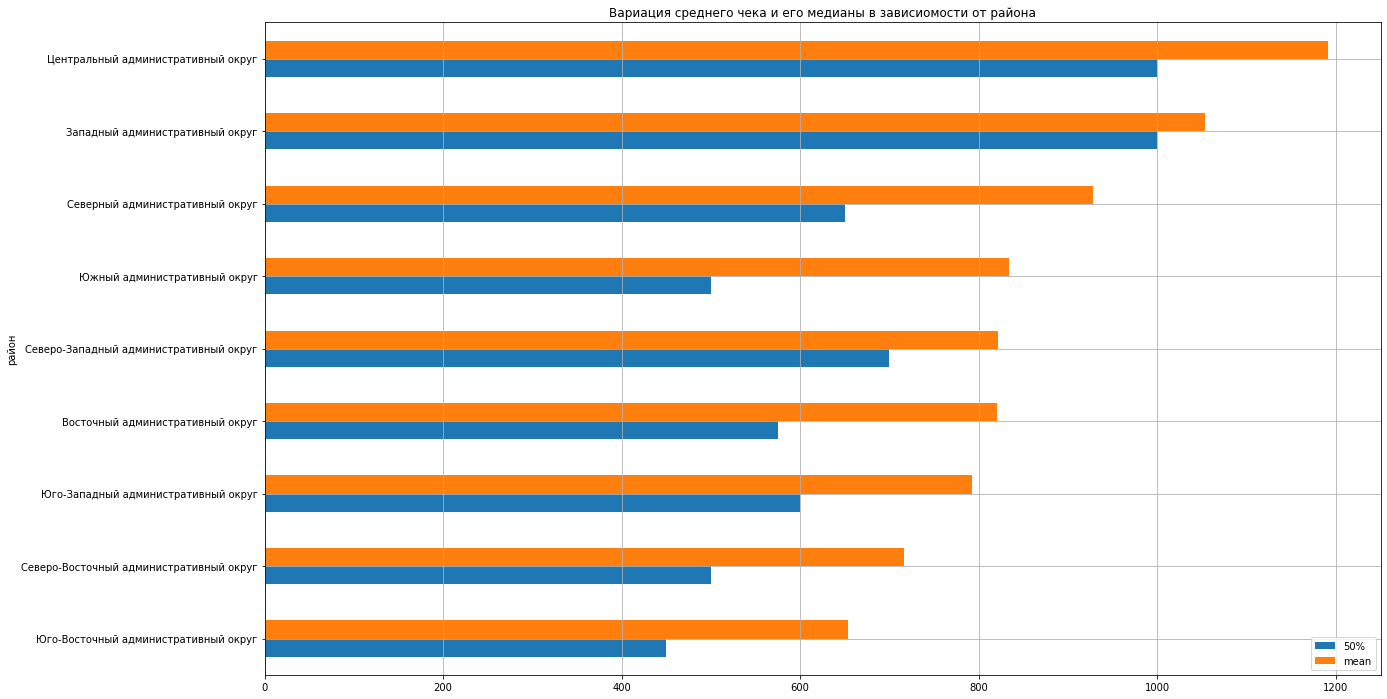

In [59]:
print(df_inf[['50%', 'mean']])
df_inf[['50%', 'mean']].sort_values(by='mean').plot(kind='barh',xlabel='район',ylabel='чек', title='Вариация среднего чека и его медианы в зависиомости от района',grid=True,figsize = (20, 12))

В рамках небольшого вывода хочу отметить что средний чек и средняя стоимость в центраальном районе ощутимо выше. Также не сильно далеко ушел западный район москвы, значит есть спрос, быть может стоит обратить внимание на эти районы, однако нужно учитывать стоимость аренды в этих районах. Также хочется отметить что в этих районах  особенно в западном медиана близка к среднему по значению что свидетельствует о рааспределении близком к нормальному, это означает что в данных районах превалируют заведения с заведомо большим средним чеком более дорогие места в общем ну это центр это нормально более турестически популярныые места больше имеено ресторанов и баров

минимальныые выбросыы по среднему чеку в западном районе и северо западном районах 

самые низкие значения среднеего чека в Северо-Восточный административный округе  и Юго-Восточном округе, ну тут скорее просто больше столовых кофеен где средний чек ну заведомо ниже

О выбросах я уже сказал что-то вписывается в норму но как будт 35 тысяч особено для Южного района очень подозрительо

---


а теперь для кофеен 

In [2]:
pivot_t = pd.pivot_table(df,
                            index= 'district',
                            values="middle_coffee_cup",
                            aggfunc="mean")

print(pivot_t)

pivot_t.plot(kind='barh',xlabel='район',ylabel='чек', title='Вариация среднего чека в зависиомости от района(кофе)',figsize = (20, 12))

NameError: name 'pd' is not defined

---

### Промежуточный вывод


Перове что хочется отметить самые многочисленные категории - кофеня, ресторан, кафе - это то что пользуется спросом но также есть большая конкуренция
В центральном районе больше всего объектов общественного питания, в ценлом как и в среднем это кофеня, ресторан, кафе, однако ресторанов значительно больше 
Очень много сетевых общепитов зачастую это булочная пиццерия и кофейня. большие сетевые гиганты не показывают хороших результатов в плане рейтинга если есть желание уйти в сервис и качество не нужно сильно масштабироваться
Медиана посадочных мест болше в ресторане барее и кофейянх, но также есть аномально старнные метса где количесвто посадочныых мест больше 1200, быть может это злоны фудкорта
Реетинг зависит от категории как и средний чек чем больше сервисоориентированность места тем выше эти показатели
Средний чек по всей Москве в среднем составляет 1000 руб медиана 750, однако есть выбросы дсотигающие значений 35к
Средний чек выше всего в центральном районе и западном, также в этих районах меньше выбросов, самый маленький средниий чек в Северо-Восточный административный округе и Юго-Восточном округе и южном как и больше выыбросы особенно в южном районе. Видимо дорогие места есть везде просто где-то их намного меньше и спроса на них почти нет

## 4. Итоговый вывод и рекомендации


1. Общий обзор проделанной работы
В ходе работы ма познакомились с данныыми о заведениях общественного питания Москвы.
Провели преедобработку данных, в ходе которое оптимизировали типы данных, работали с пропущенныыми значениями. Также боролись с явными и неявными дубликатами(нашли и удалили 4)
Провели дальнейшее исследование
2. Были получены ответы на исследовательские вопросы
- всего 8 категорий , превалируют кафе, рестораны, кофейни
- большше 25 проценнтов заведений в центре расположены С-З район около 5 оч мало остальныые окло 9-10
- Сетевых завдений 60 процентов, больше всего в категории булочная пиццерия и кофейня
- Медиана посадочных мест болше в ресторане барее и кофейянх, что странно, шипотеза о фудкортах актуальна, меньше всего у булочных и пиццерий
- Как видно в целом средний рейтинг у всех категорий завдений больше четырех, максимальный рейтинг в барах и пицццериях, наименьшнй у кафе и ресторанов быстрого питания
- Ну тут все просто чем выше категория стоимости тем выше рейтинг чем больше платишь тем лучше сервис оценки
- ну по большей чаасти этокофейни и кафе но средний рейтинг оставляет жеелать лушего
- Средний чек по всей Москве в среднем составляет 1000 руб медиана 750, однако есть выбросы дсотигающие значений 35к. Максимальные значения среднего чека в Центральном и Западном райолнах, минимальныые выбросыы по среднему чеку в западном районе и северо западном районах, самые низкие значения среднеего чека в Северо-Восточный административный округе и Юго-Восточном округе, ну тут скорее просто больше столовых кофеен где средний чек ну заведомо ниже
О выбросах я уже сказал что-то вписывается в норму но как будт 35 тысяч особено для Южного района очень подозрительо
3. Какие рекомендации можно дать. Ну вообще выбор это комбинация факторов надо понимать что хочется получить на выходе, да в центре большой спрос и выше цены, но и выше конкуренция а также аренда. Кофейни на каждом углу и они популярны нно их так много. Нужно провести более глубокий анализ по хорошему, однако я быы обратил внимание на развивающиеся районы, по типу западного где цены ну не сильно от центра отличаются но где меньше объектов общепита, кофейни я бы наверное не брал хотя кофейня в удобном месте у метро например на вынос удобно а если их еще и несколько. Наверное я бы посоветовал уйти в развитие о бренда и сети, но не огромной как шоколадница, это было бы кафе, ресторан или бар, я бы больше обратил внимание на сервис и на рейтинг. Однако это немного протиоречит конццепту о заработке денег, тут нужно больше, в активныых точках и не отлично, а хрошо то трребует большой капитал на входе. Быть может стоит обратить внимание на те категории которые мене популярны, привнести что-то новое ир занять нишу на рынке в отстуствии сильной конкуренции тут важен спрос